# Project Description

# Overview

Introduction:

This capstone project involves analyzing a dataset extracted from the 1994 Census Bureau database. The dataset was cleaned using certain conditions, including age, income, final weight, and hours worked. The main objective of the project is to predict whether a person's income exceeds $50,000 per year based on various demographic and socioeconomic factors.

Description of fnlwgt (final weight):
The fnlwgt (final weight) variable in the dataset represents the weight assigned to each record in order to make it representative of the overall population. The weights are calculated based on independent estimates of the civilian non-institutional population of the United States. The weights ensure that the sample reflects the demographic characteristics of the population being studied.

The goal of the project is to make a prediction model, to determine whether a person makes over $50K a year or not.

Target Variable:
The target variable in this project is the 'Income' level of individuals. The target variable 'Income' has two values: '<=50K' and '>50K', indicating whether an individual's income is less than or equal to 50,000 per year or greater than 50,000 per year, respectively.

Independent Variables:
The independent variables, also known as features, are the various demographic and socioeconomic factors that will be used to predict the target variable. These may include age, education level, occupation, marital status, race, gender, and other relevant attributes available in the dataset.

# Importing Necessary libraries

In [1]:
# Import Necessary Libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import joblib
pd.set_option('display.max_columns', None)

# Importing Datset

Dataset Description:

The dataset which is used in this project to perform the tasks can be accessed from the following link: 
https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

Column Description:

1. Age: This column represents the age of the individual. 

2. Workclass: This column indicates the individual's type of employment, such as private, self-employed, government, etc. 

3. Fnlwgt: The fnlwgt (final weight) column is not directly relevant in predicting income. It is a weight assigned to each record for statistical purposes, ensuring the sample reflects the population accurately. 

4. Education: This column represents the highest level of education attained by the individual. 

5. Education_num: This column provides a numerical representation of the education level, which can be used as an alternative to the categorical Education column. 

6. Marital_status: This column indicates the individual's marital status, such as married, divorced, single, etc. 

7. Occupation: This column specifies the individual's occupation or job type. Occupation is highly relevant in predicting income as different occupations have different salary ranges and income potentials.

8. Relationship: This column represents the person's role in the family (e.g., husband, wife, own-child, unmarried, etc.). 

9. Race: This column indicates the individual's race or ethnicity. While it should be noted that race should not be used as a sole predictor of income, it can be relevant in capturing disparities or socioeconomic factors associated with certain racial or ethnic groups.

10. Sex: This column represents the individual's gender. Gender can be relevant as it may reflect income disparities between males and females due to various factors, such as wage gaps or occupational segregation.

11. Capital_gain: This column represents the individual's capital gains from investments or assets. 

12. Capital_loss: This column represents the individual's capital losses from investments or assets. 

13. Hours_per_week: This column indicates the number of hours the individual works per week. 

14. Native_country: This column represents the individual's country of origin. 

15. Income: This column is the target variable and indicates whether the individual's income is higher or not, with values '>50K' and '<=50K', respectively. This is the variable you aim to predict based on the other features in the dataset.

In [2]:
df= pd.read_csv("census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# Replace values in the income column
df['Income'] = df['Income'].str.strip().replace({'<=50K': 0, '>50K': 1})

In [4]:
df = df.drop(['Fnlwgt'], axis = 1)

In [5]:
df.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [6]:
df.tail()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32559,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


# Exploratory Data Analysis(EDA)

It is an approach to analyze the datasets, and summarize their characteristics. Here we are analyzing dataset by first checking with the dimensions of the dataset, then checking for the null values present in the dataset, followed by the memory usage detail by using info() function, checking with value counts and unique values present in dataset, followed by statistical summary of dataset(numerical column), which ends with graphical analysis.

Let's start with checking the dimension of the dataset using df.shape attribute, then we will be seeing df.columns and df.dtypes attributes to check the columns and their datatypes, which will be followed by isnull().sum() function which will check the missing data present in each column of the dataset. We will also visualize the null values using heatmap to clear the confusion. And then we will be describing the statistical summary by using df.describe() function.

In [7]:
df.shape

(32560, 14)

In [8]:
df.columns

Index(['Age', 'Workclass', 'Education', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [9]:
# Check the dtypes
df.dtypes

Age                int64
Workclass         object
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income             int64
dtype: object

In [10]:
# convert object data type to categorical data
df['Workclass'] = df['Workclass'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Marital_status'] = df['Marital_status'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')
df['Relationship'] = df['Relationship'].astype('category')
df['Race'] = df['Race'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Native_country'] = df['Native_country'].astype('category')

As we can see there is two type of datatypes are present in the dataset i.e., int64(7), and categorical(8).

In [11]:
# Let's check null values in each columns now
df.isnull().sum()

Age               0
Workclass         0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

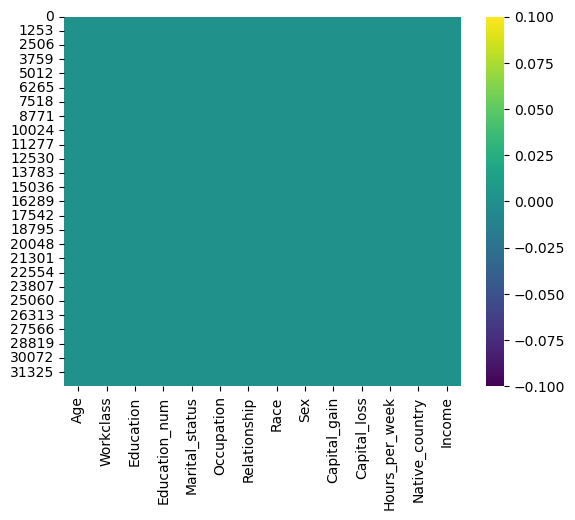

In [12]:
# Visualize null values by heatmap

sns.heatmap(df.isnull(), cmap = 'viridis')
plt.show()

As we can see no null values are present in any column.

In [13]:
# Check details of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             32560 non-null  int64   
 1   Workclass       32560 non-null  category
 2   Education       32560 non-null  category
 3   Education_num   32560 non-null  int64   
 4   Marital_status  32560 non-null  category
 5   Occupation      32560 non-null  category
 6   Relationship    32560 non-null  category
 7   Race            32560 non-null  category
 8   Sex             32560 non-null  category
 9   Capital_gain    32560 non-null  int64   
 10  Capital_loss    32560 non-null  int64   
 11  Hours_per_week  32560 non-null  int64   
 12  Native_country  32560 non-null  category
 13  Income          32560 non-null  int64   
dtypes: category(8), int64(6)
memory usage: 1.7 MB


In [14]:
# Let's looping through each column to get value counts

for col in df.columns:
    print("Value counts for{col}:")
    print(df[col].value_counts())

Value counts for{col}:
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
Value counts for{col}:
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Value counts for{col}:
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
Value counts for{col}:
9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6      

In [15]:
# loop through each column to get unique values
for col in df.columns:
    print("Unique values in {col}:")
    print(df[col].unique())

Unique values in {col}:
[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Unique values in {col}:
[' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov', ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked']
Categories (9, object): [' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ..., ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay']
Unique values in {col}:
[' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ..., ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th']
Length: 16
Categories (16, object): [' 10th', ' 11th', ' 12th', ' 1st-4th', ..., ' Masters', ' Preschool', ' Prof-school', ' Some-college']
Unique values in {col}:
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Unique values in {col}:
[' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', '

# Description Of Dataset

In [16]:
# Satistical summary of numerical columns

df.describe()

,Age,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,10.080590,1077.615172,87.306511,40.437469,0.240817
std,13.640642,2.572709,7385.402999,402.966116,12.347618,0.427586
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


This statistical summary of numerical columns include the count, mean, standard deviation, minimum value, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum value for each variable.

These statistics will be providing an overview of the distribution and range of values for each numerical feature in your dataset. They will be useful for understanding the central tendency, spread, and potential outliers in the data.

# Data Visualization - Graphical Analysis

Here we will be performing data visualization techniques like Univariate, Bivariate , and Multivariate analysis to visually explore and analyze the data. It will helps us in gaining the insights into the patterns,distribution, and relatioship present in dataset. For plotting different graphs we wil be import seaborn and matplotlib Python libraries. By creating various plots, we can easly visualize the data.

Univariate Analysis

Here, to perform univariate analysis in numerical column we will be using Density plot,and boxplot. Using a bar plot to each categorical column and will see the distribution, skewness and presence of outliers in the data present in each columns.

A. Categorical Column

1. 'Workclass'

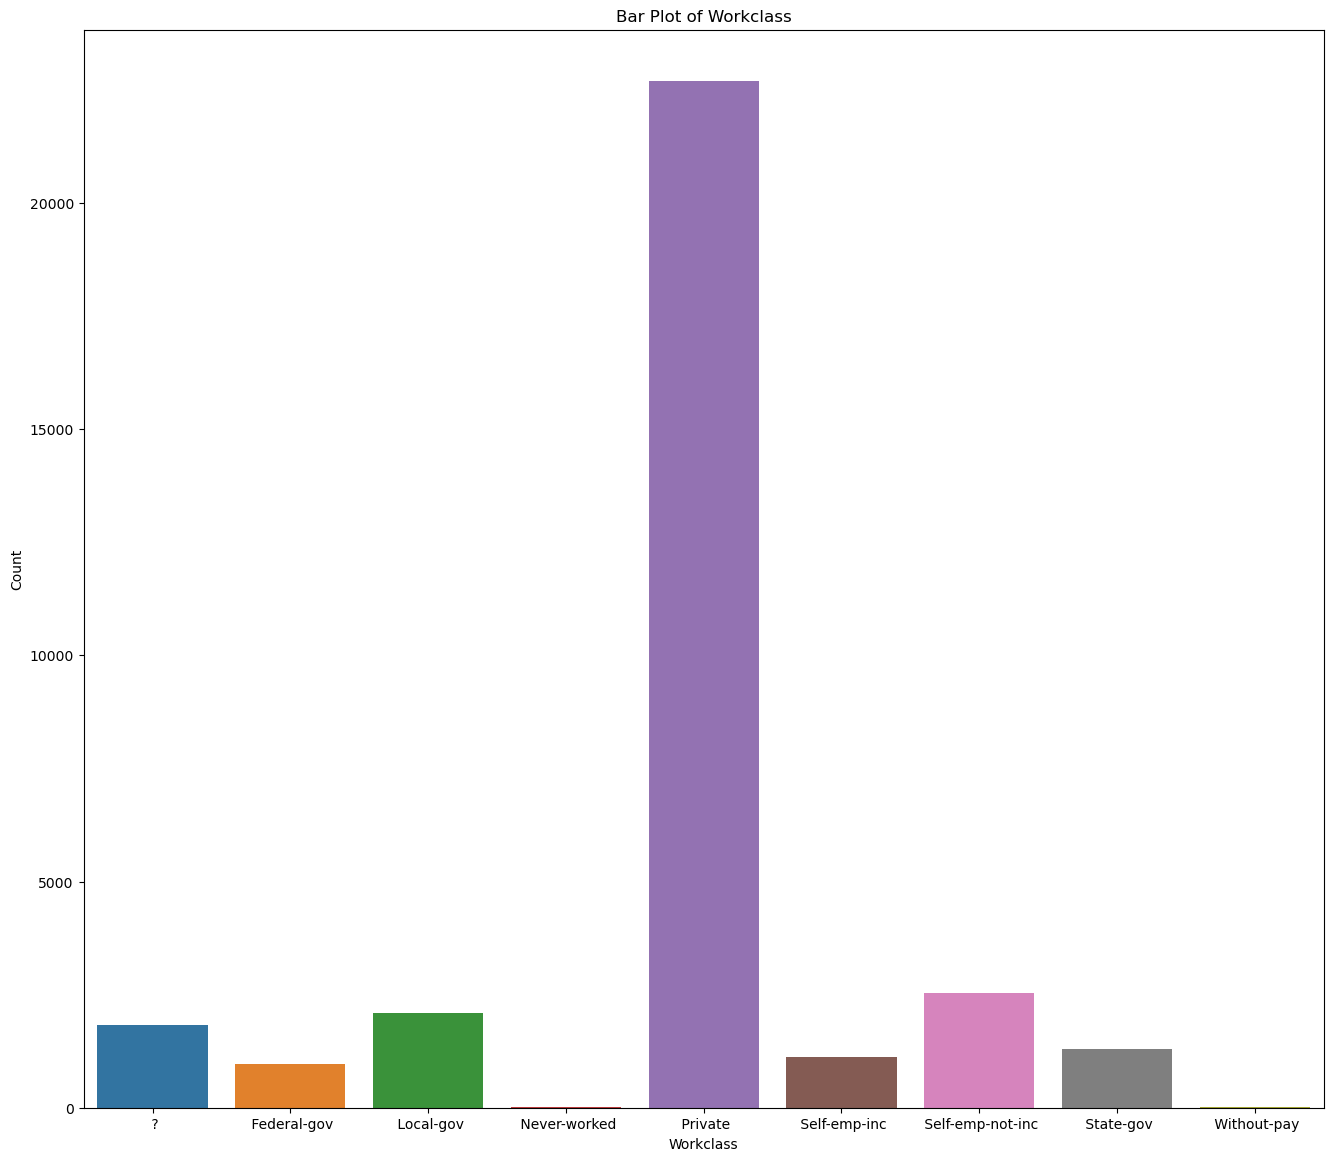

In [17]:
# Let's visualize the 'Workclass' column by bar plot

plt.figure(figsize=(16,14))
sns.countplot(x='Workclass', data=df)
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Bar Plot of Workclass')
plt.show()

Here we can visualize that private workclass count is higher in the dataset.

2. 'Education'

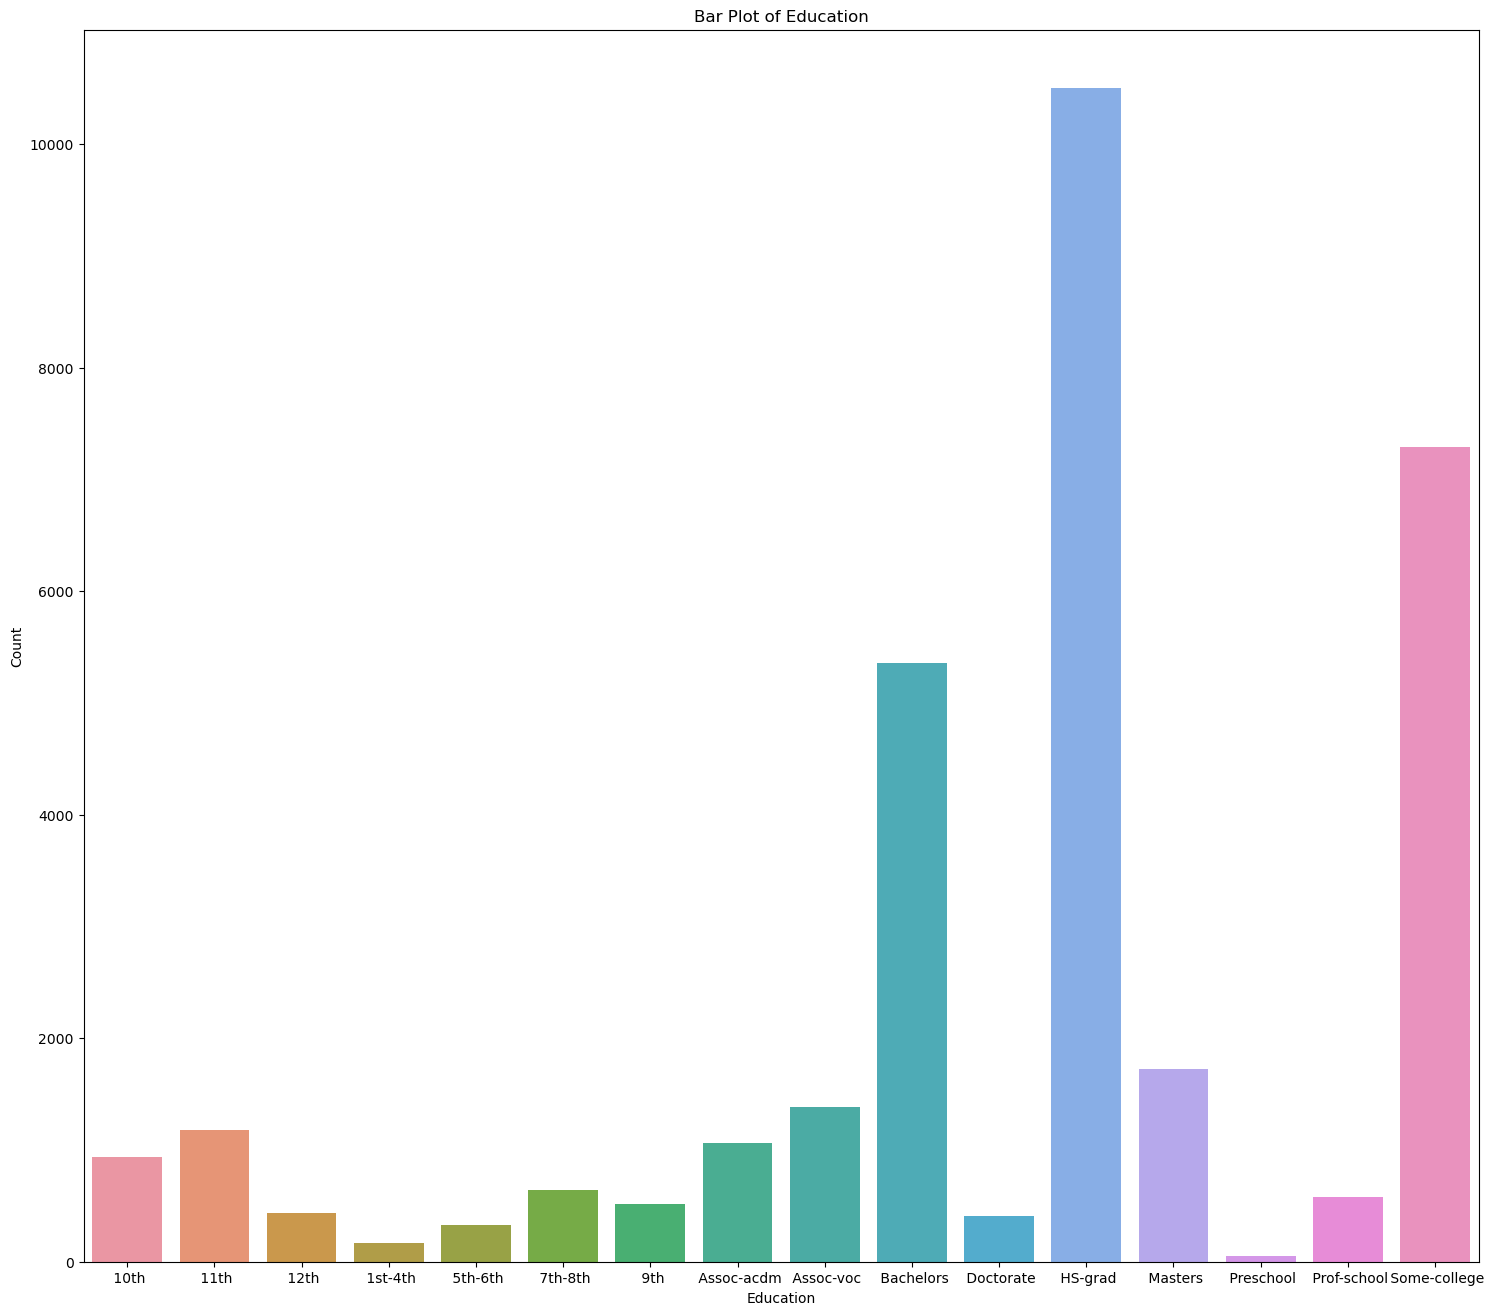

In [18]:
# Let's visualize the 'Education' column by bar plot

plt.figure(figsize=(18,16))
sns.countplot(x='Education', data=df)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Bar Plot of Education')
plt.show()

As we can see in the visualization that HS-grad education has the highest count.

3. 'Marital-status'

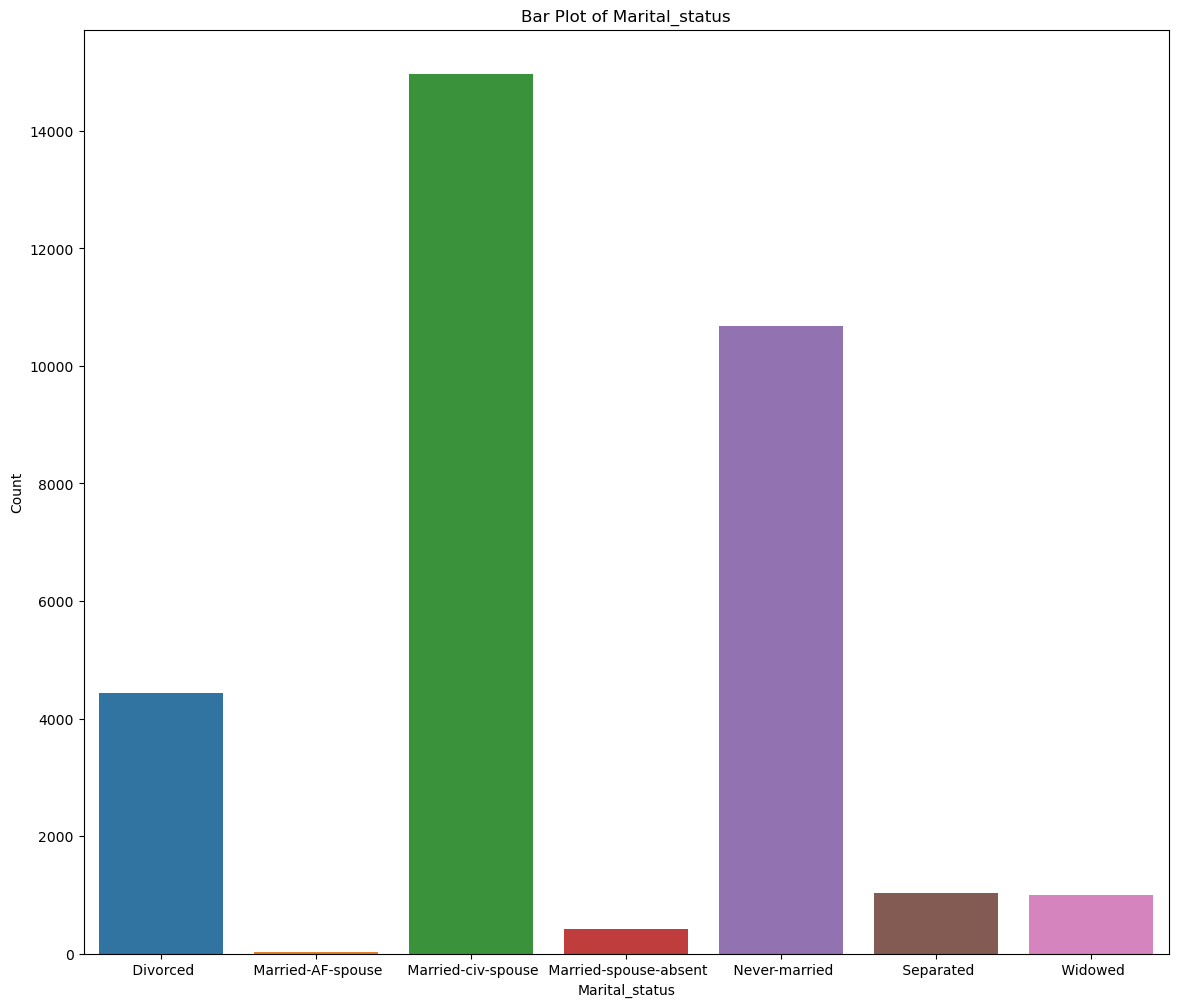

In [19]:
# Let's visualize the 'Marital_status' column by bar plot

plt.figure(figsize=(14,12))
sns.countplot(x='Marital_status', data=df)
plt.xlabel('Marital_status')
plt.ylabel('Count')
plt.title('Bar Plot of Marital_status')
plt.show()

Here we can see in this visualization plot that count for married-civ-spouse is the highest.

4. 'Occupation'

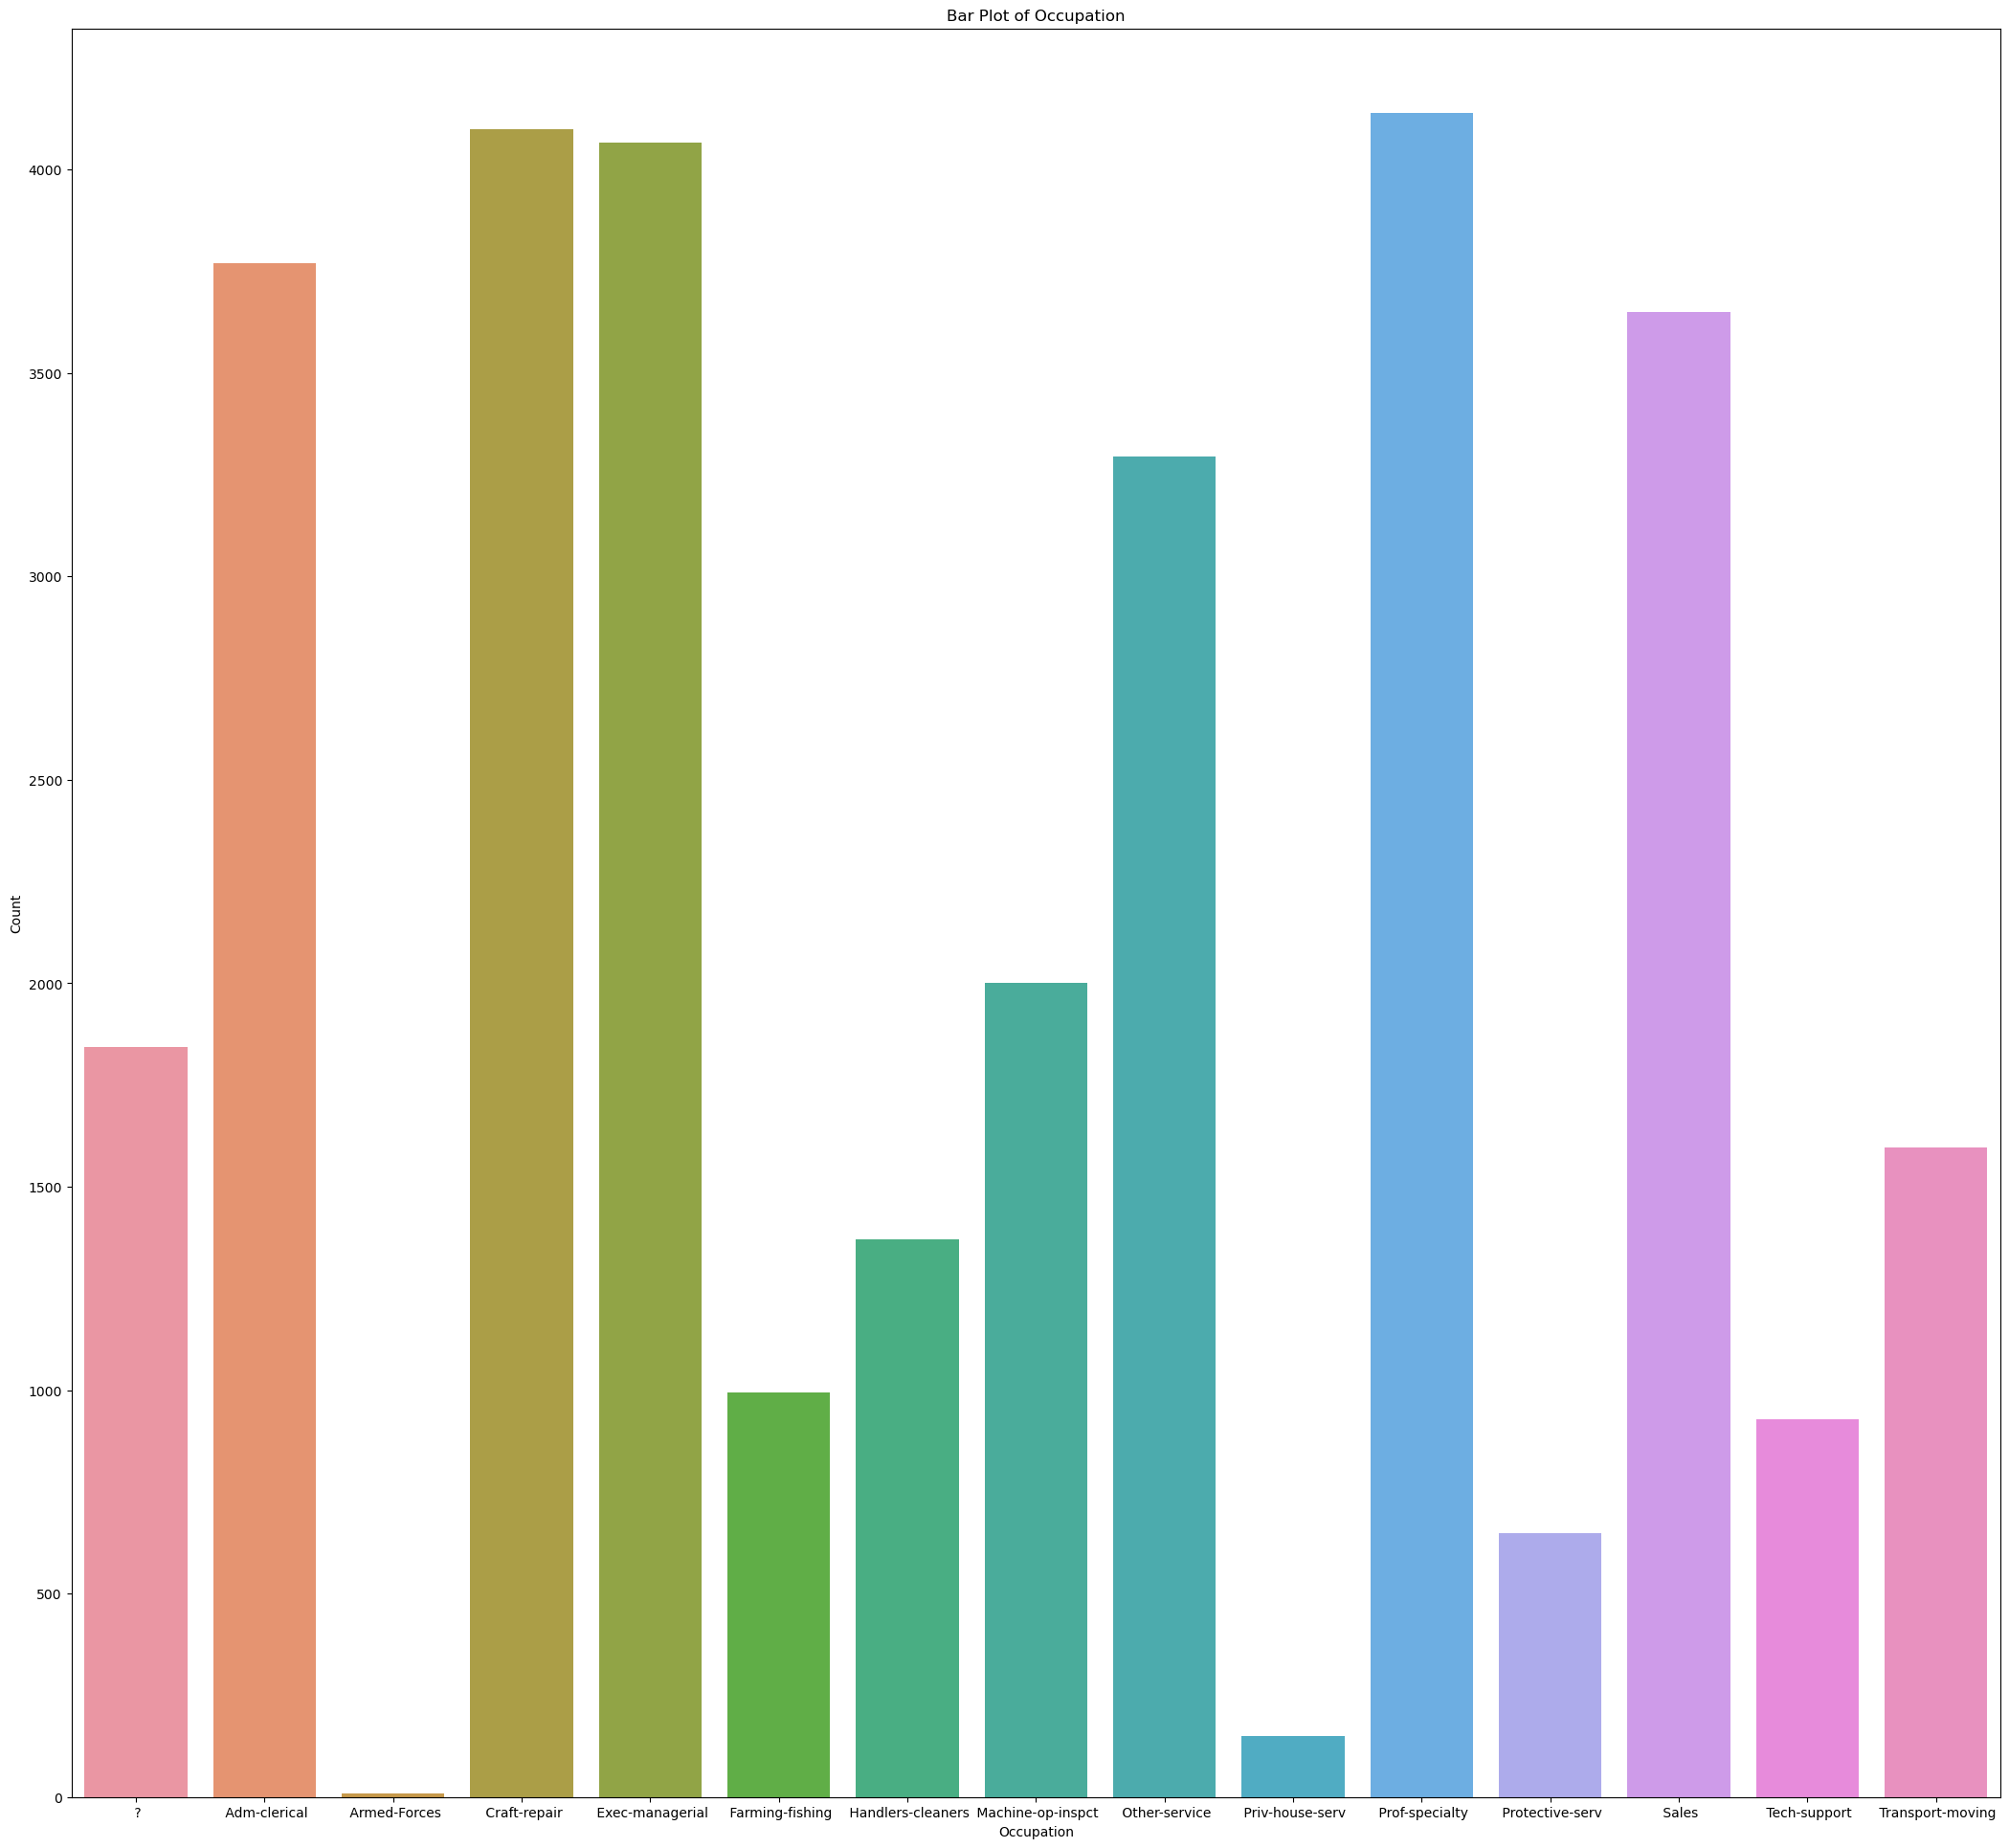

In [20]:
# Let's visualize the 'Occupation' column by bar plot

plt.figure(figsize=(26,24))
sns.countplot(x='Occupation', data=df)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Bar Plot of Occupation')
plt.show()

As we can see in this analysis plot count of prof-specialty occupation is the highest and followed by craft-repair.

5. 'Relationship'

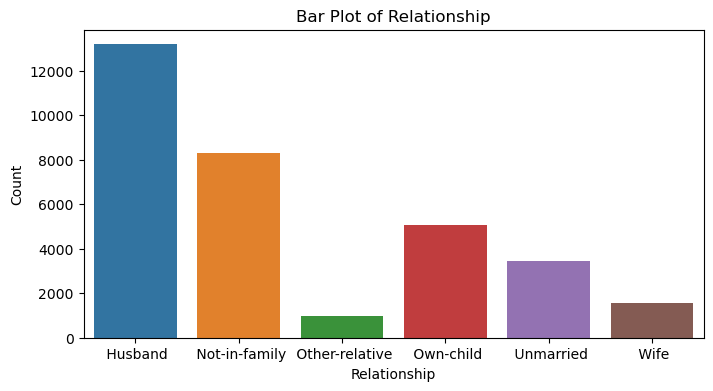

In [21]:
# Let's visualize the 'Relationship' column by bar plot

plt.figure(figsize=(8,4))
sns.countplot(x='Relationship', data=df)
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.title('Bar Plot of Relationship')
plt.show()

As we can analyse that count of husband is highest for census income.

6. 'Race'

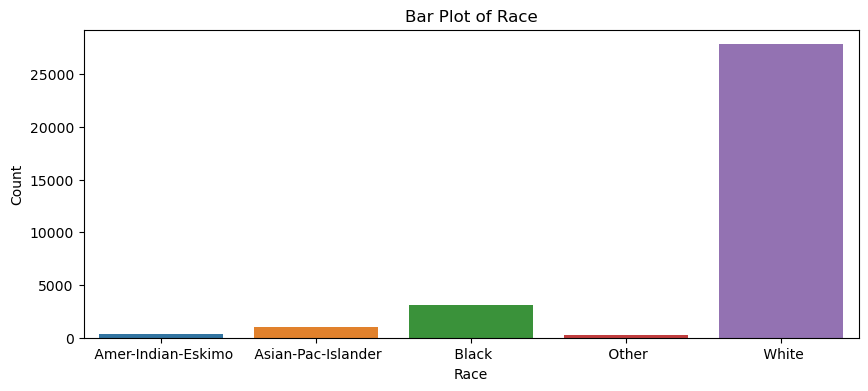

In [22]:
# Let's visualize the 'Race' column by bar plot

plt.figure(figsize=(10,4))
sns.countplot(x='Race', data=df)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Bar Plot of Race')
plt.show()

As we can see the count of white race is the highest.

7. 'Sex'

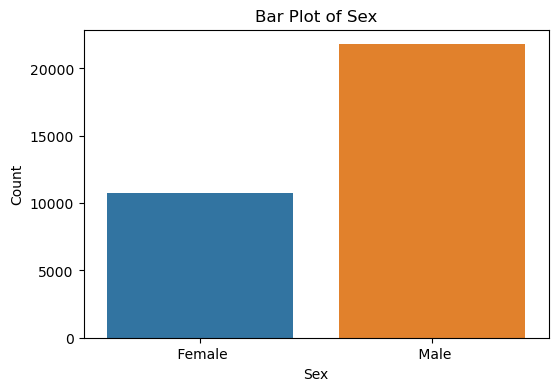

In [23]:
# Let's visualize the 'Sex' column by bar plot

plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Bar Plot of Sex')
plt.show()

As we can see the count of male is highest.

8. 'Native_country'

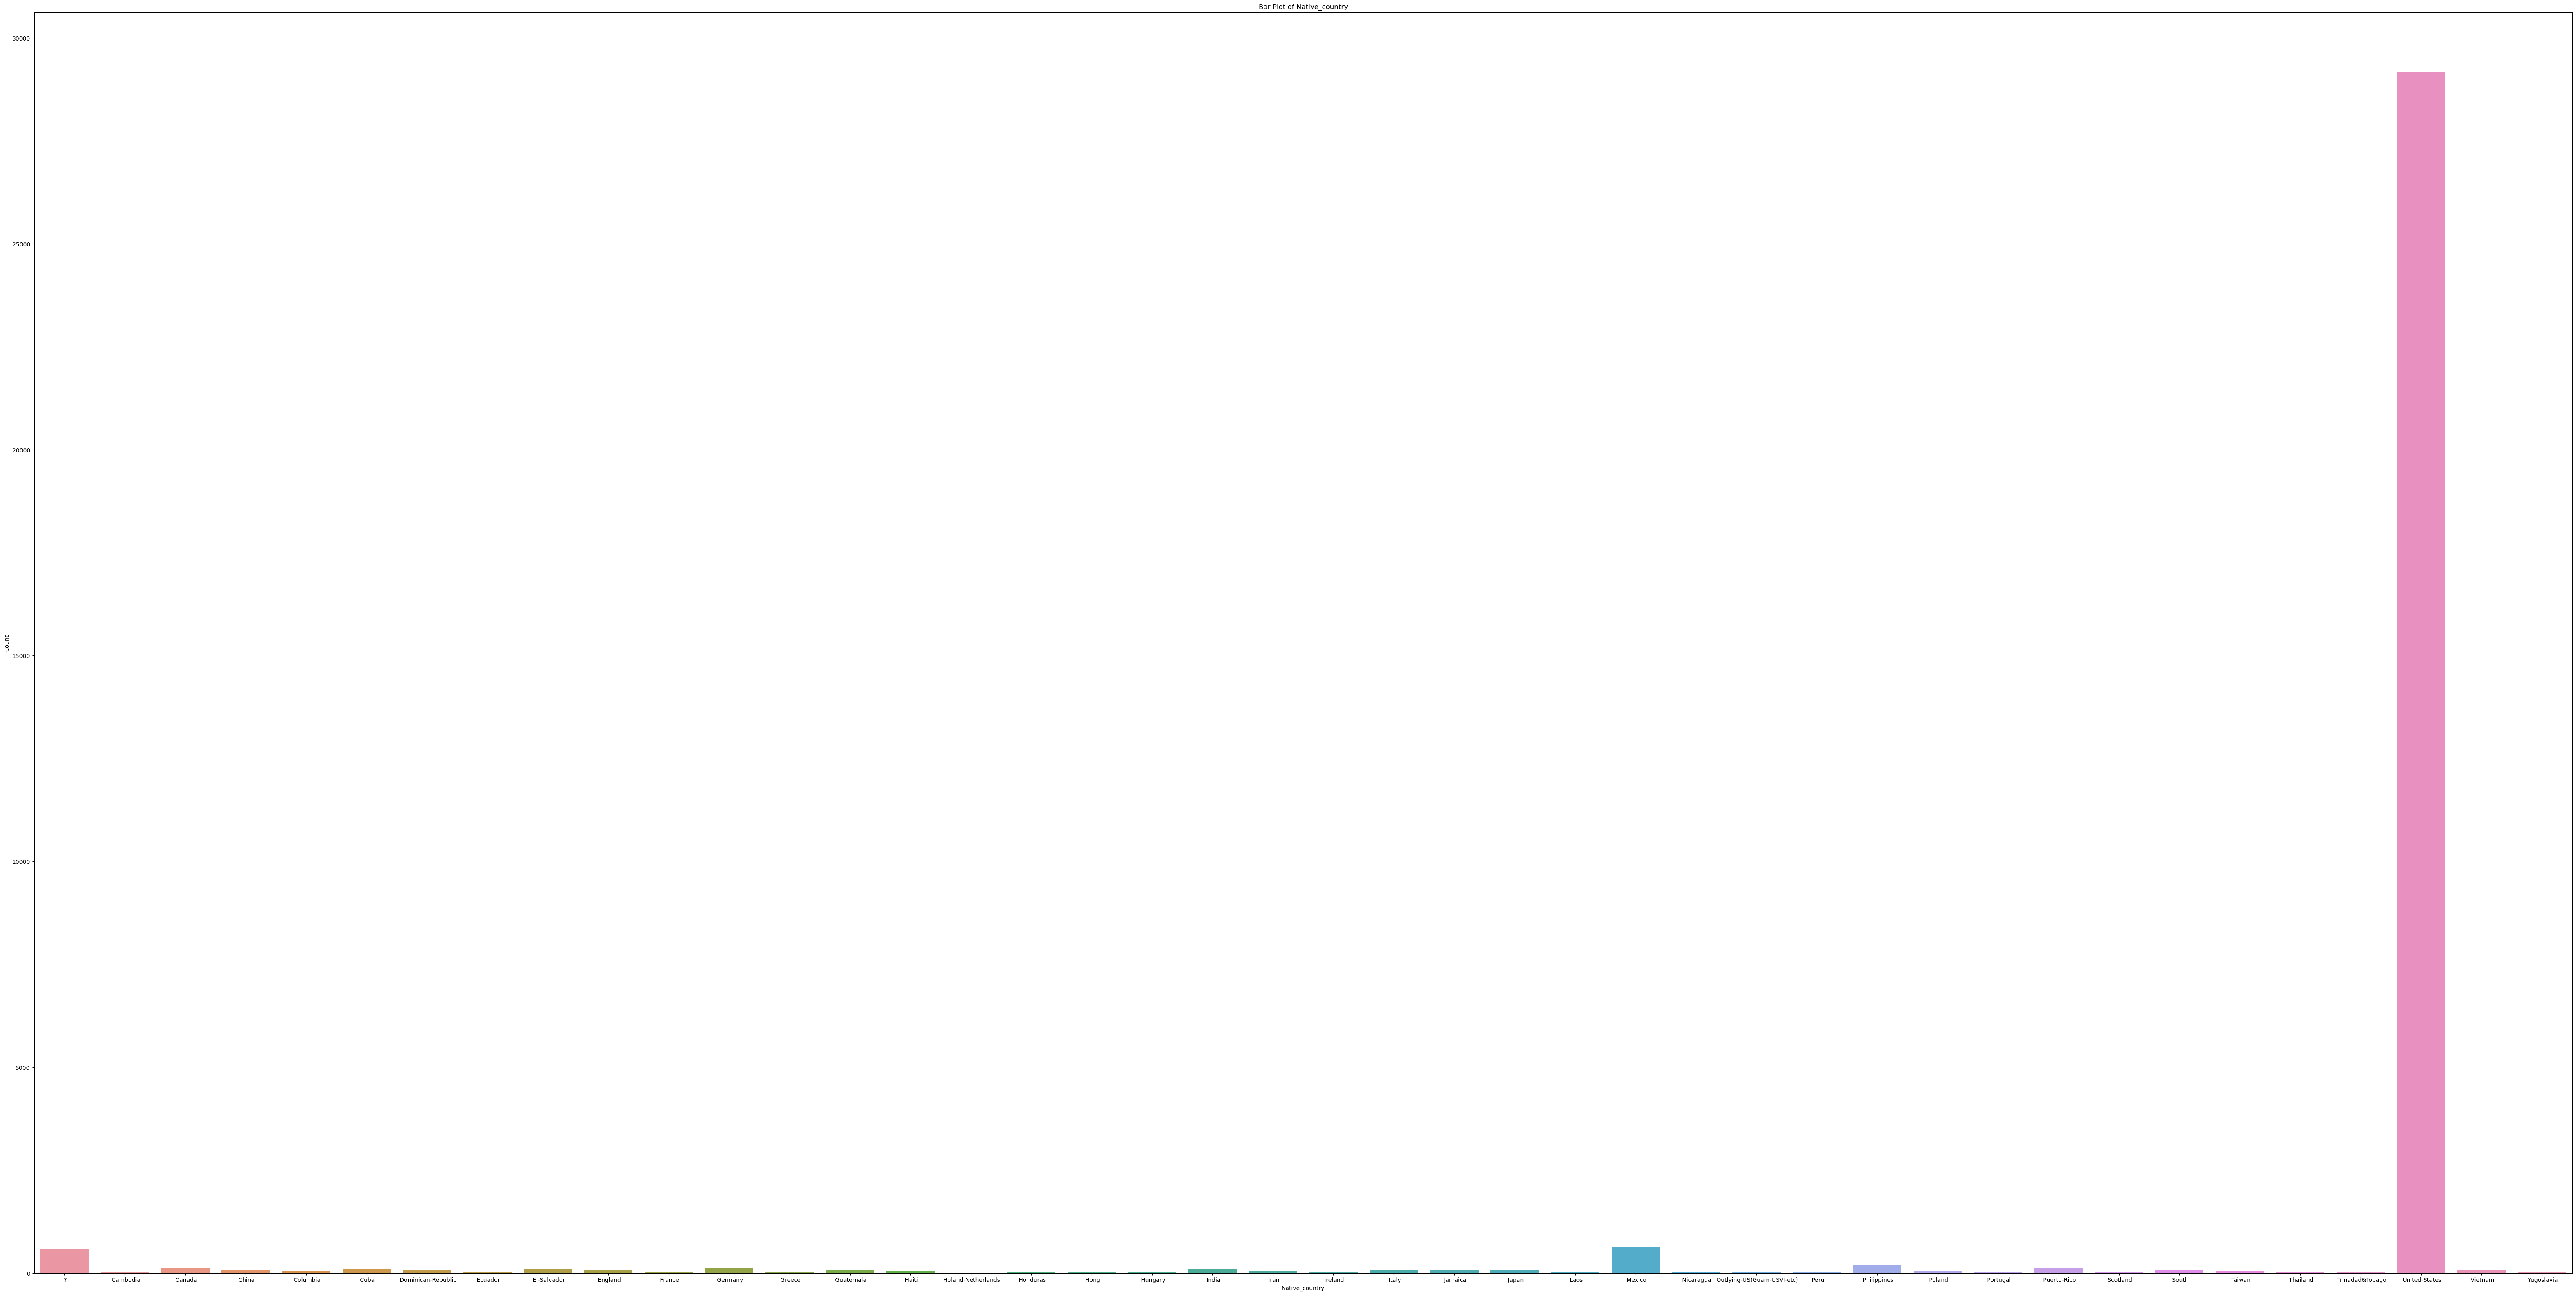

In [24]:
# Let's visualize the 'Native_country' column by bar plot

plt.figure(figsize=(80,40))
sns.countplot(x='Native_country', data=df)
plt.xlabel('Native_country')
plt.ylabel('Count')
plt.title('Bar Plot of Native_country')
plt.show()

Here we can see count of United-states is the highest followed by mexico.

B. Numerical Column

1. 'Age'

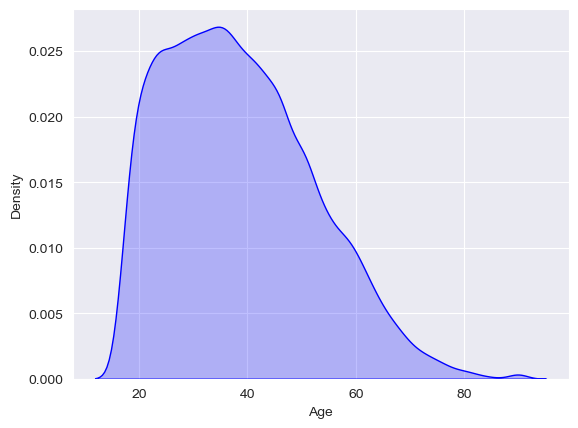

In [25]:
# Now let's analyze the 'Age' column by using density plot

sns.set_style("darkgrid")
sns.kdeplot(df["Age"], shade=True, color='Blue')
plt.show()

Here we can see the slight right skewness in the data distribution.

2. 'Education_num'

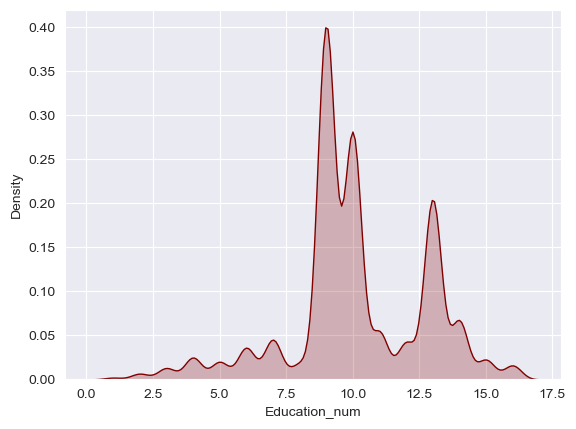

In [26]:
# Now let's analyze the 'Education_num' column by using density plot

sns.set_style("darkgrid")
sns.kdeplot(df["Education_num"], shade=True, color='maroon')
plt.show()

Here we can see comb like distribution.

3. 'Capital_gain'

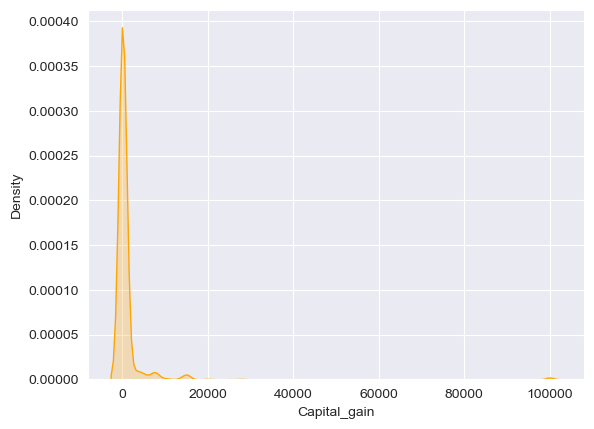

In [27]:
# Now let's analyze the 'Capital_gain' column by using density plot

sns.set_style("darkgrid")
sns.kdeplot(df["Capital_gain"], shade=True, color='orange')
plt.show()

Here we can analyse highly right skewed distribution.

4. 'Capital_loss'

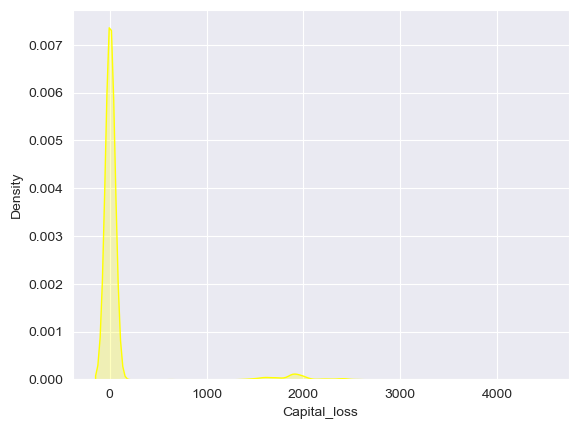

In [28]:
# Now let's analyze the 'Capital_loss' column by using density plot

sns.set_style("darkgrid")
sns.kdeplot(df["Capital_loss"], shade=True, color='yellow')
plt.show()

Here too we can see highly right skewed distribution.

5. 'Hours_per_week'

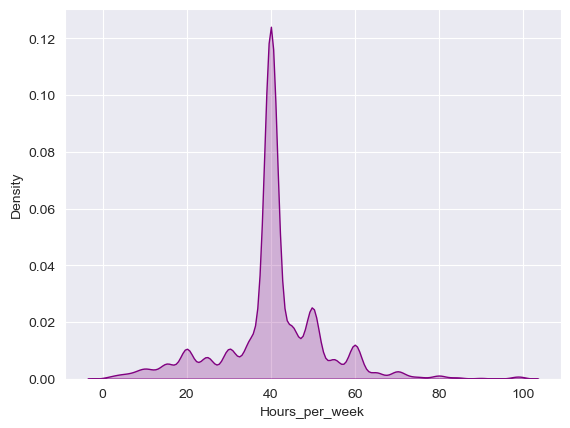

In [29]:
# Now let's analyze the 'Hours_per_week' column by using density plot

sns.set_style("darkgrid")
sns.kdeplot(df["Hours_per_week"], shade=True, color='purple')
plt.show()

Here we can see normal distribution.

6. 'Income'

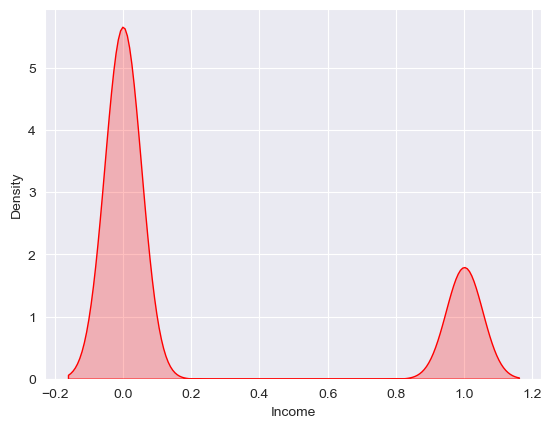

In [30]:
# Now let's analyze the 'Income' column by using density plot

sns.set_style("darkgrid")
sns.kdeplot(df["Income"], shade=True, color='red')
plt.show()

Here we can see bimodal distribution.

Bivariate Analysis

1. 'Income' vs 'Workclass'

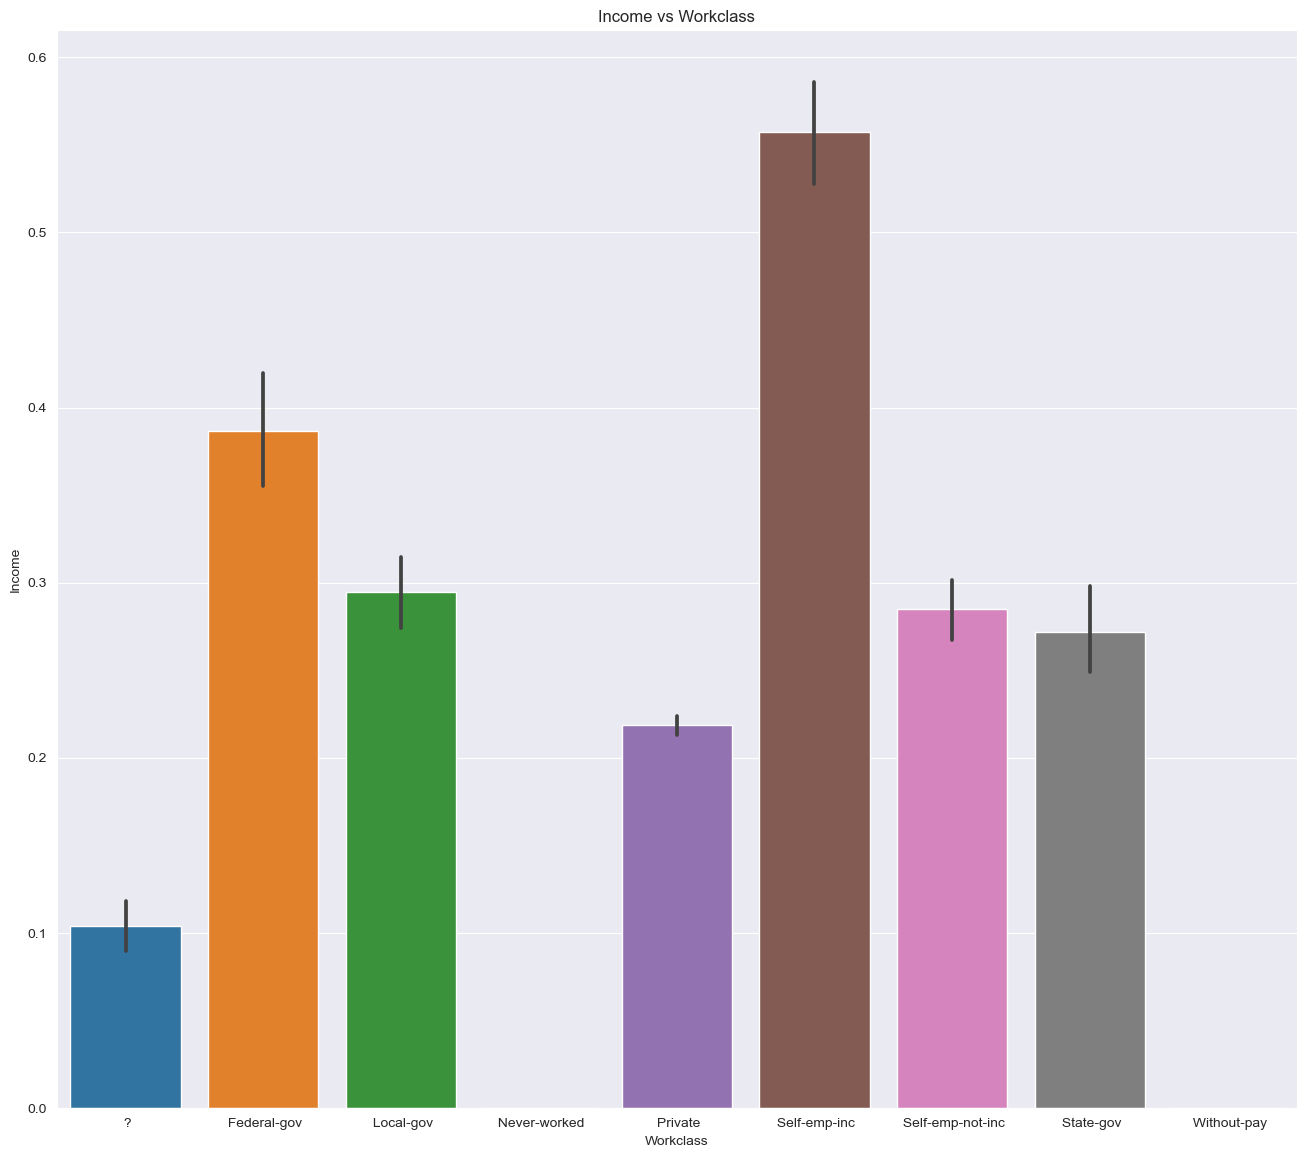

In [31]:
plt.figure(figsize= (16,14))
sns.barplot(data=df, y= 'Income', x= 'Workclass')
plt.ylabel('Income')
plt.xlabel('Workclass')
plt.title('Income vs Workclass')
plt.show()

Here we can see income of self-emp-inc is the highest.

2. 'Income' vs 'Education'

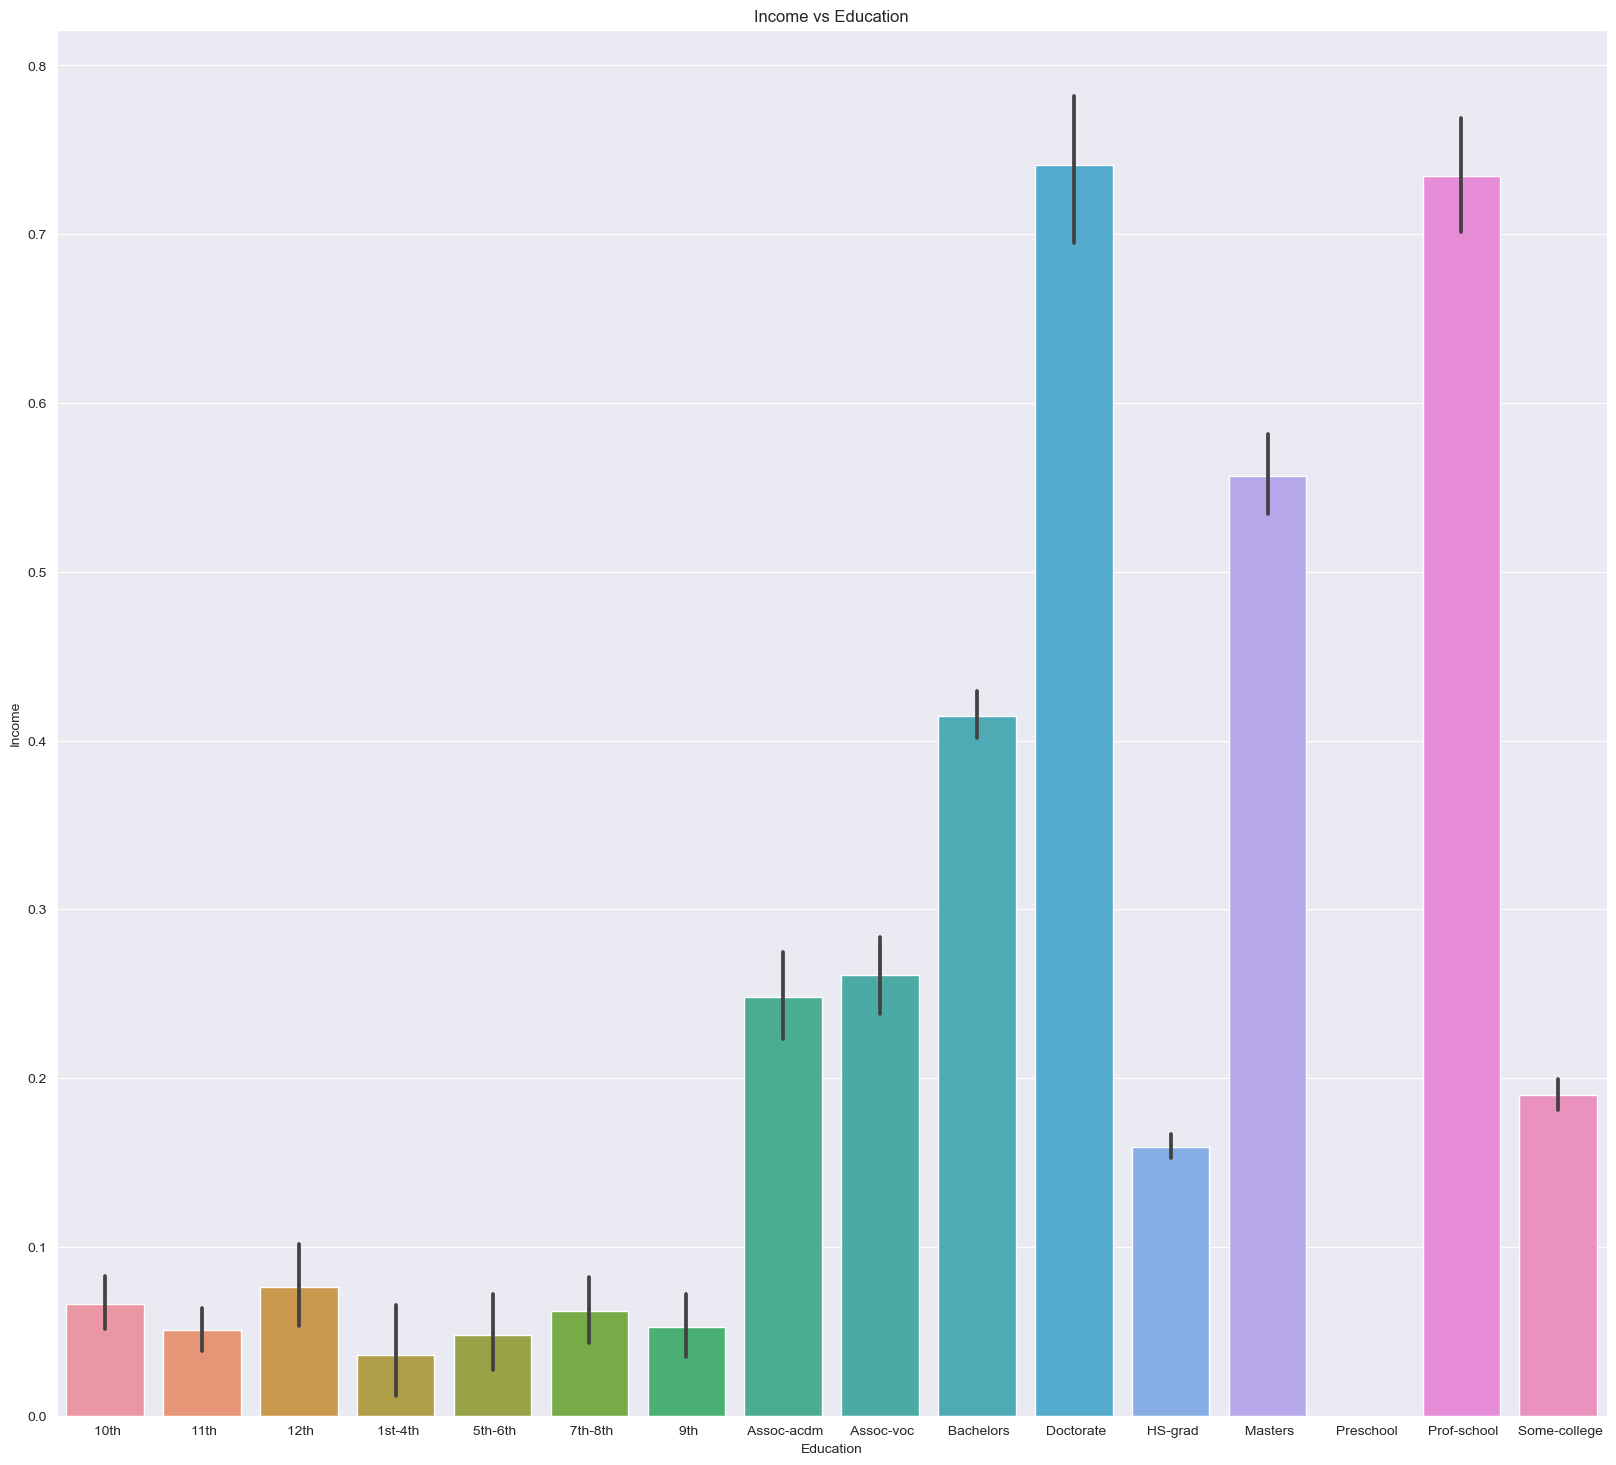

In [32]:
plt.figure(figsize= (20,18))
sns.barplot(data=df, y= 'Income', x= 'Education')
plt.ylabel('Income')
plt.xlabel('Education')
plt.title('Income vs Education')
plt.show()

Here in this analysis plot we can say income of Doctrate is the highest.

3. 'Income' vs 'Occupation'

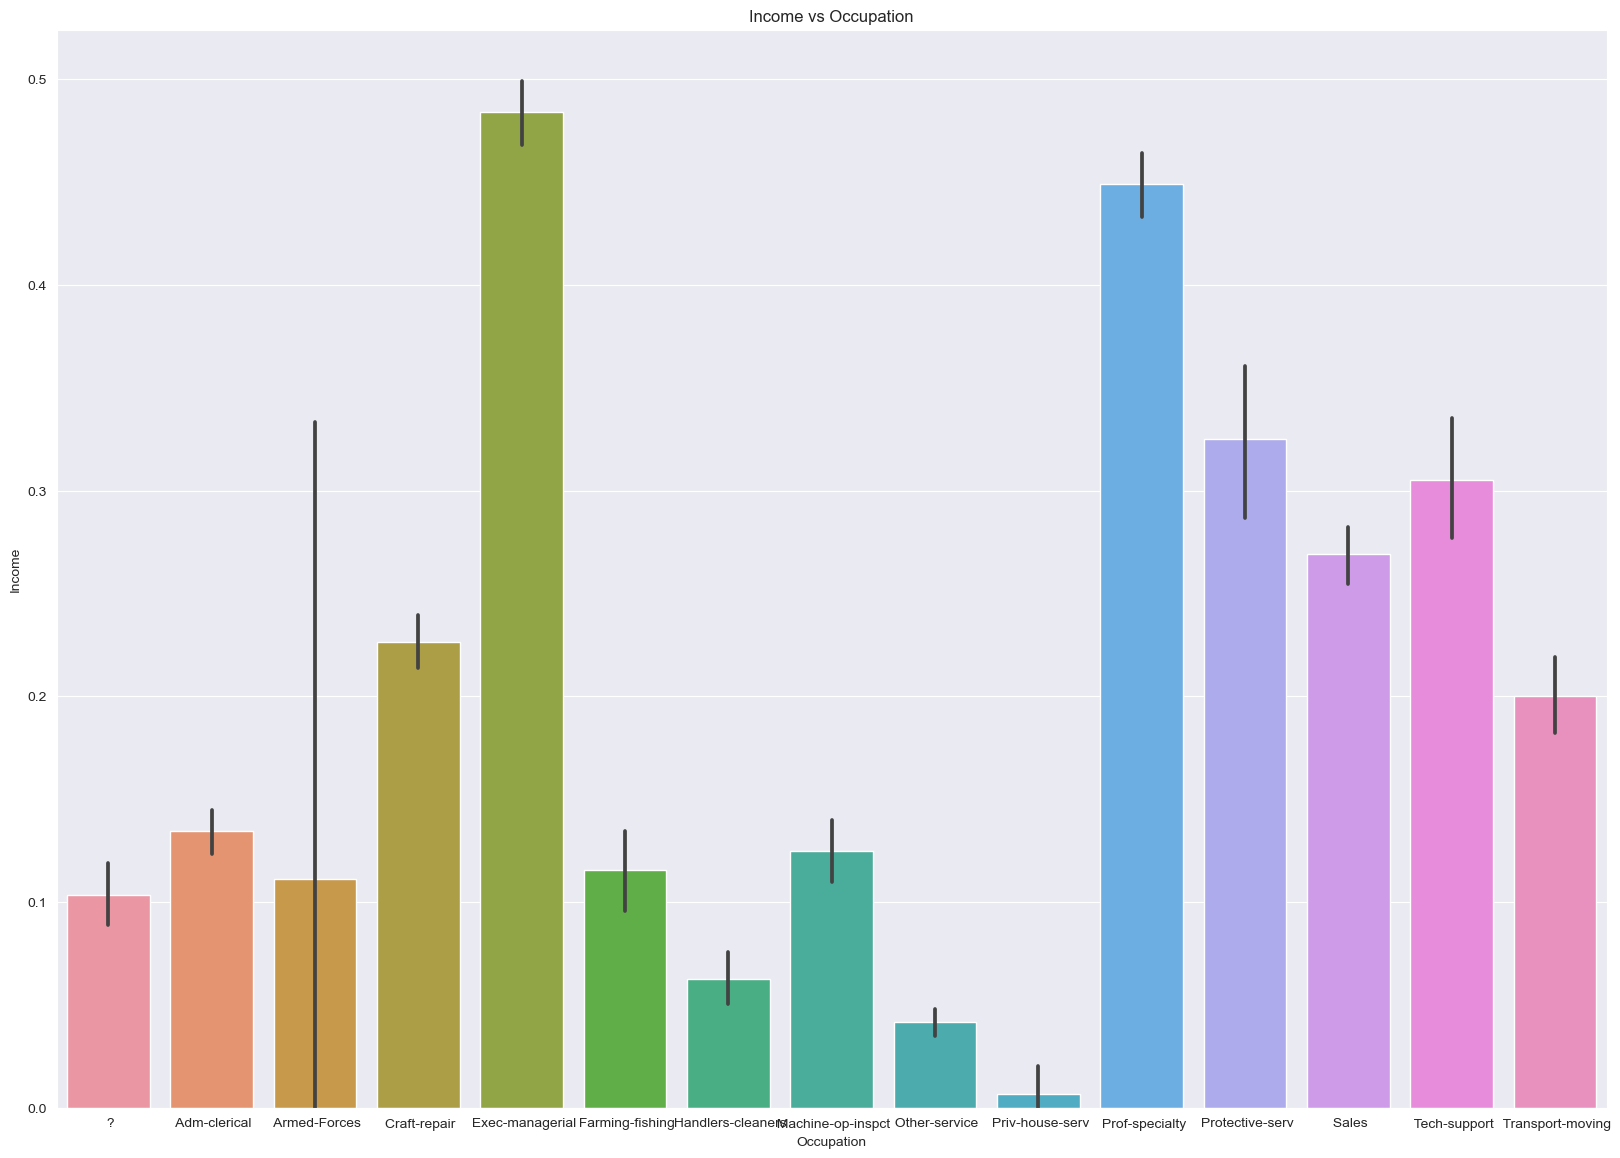

In [33]:
plt.figure(figsize= (20,14))
sns.barplot(data=df, y= 'Income', x= 'Occupation')
plt.ylabel('Income')
plt.xlabel('Occupation')
plt.title('Income vs Occupation')
plt.show()

4. 'Income' vs 'Sex'

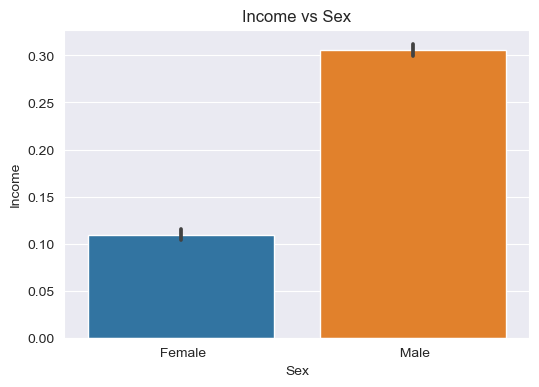

In [34]:
plt.figure(figsize= (6,4))
sns.barplot(data=df, y= 'Income', x= 'Sex')
plt.ylabel('Income')
plt.xlabel('Sex')
plt.title('Income vs Sex')
plt.show()

We can see Income of male is highest.

5. 'Income' vs 'Capital_gain'

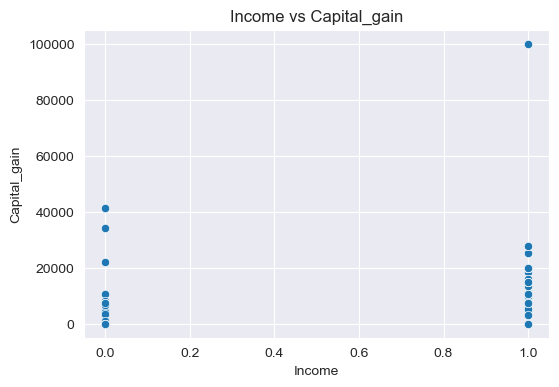

In [35]:
plt.figure(figsize= (6,4))
sns.scatterplot(data=df, x= 'Income', y= 'Capital_gain')
plt.xlabel('Income')
plt.ylabel('Capital_gain')
plt.title('Income vs Capital_gain')
plt.show()

Null relation is shown.

6. 'Income' vs 'Capital_loss'

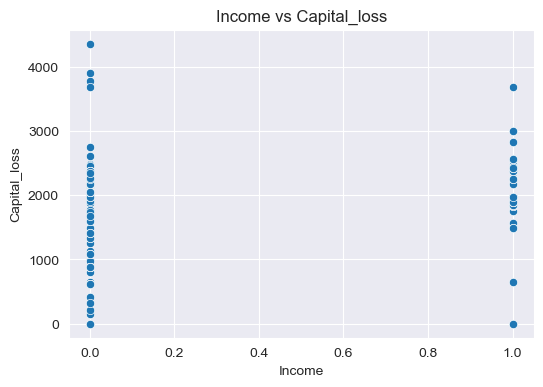

In [36]:
plt.figure(figsize= (6,4))
sns.scatterplot(data=df, x= 'Income', y= 'Capital_loss')
plt.xlabel('Income')
plt.ylabel('Capital_loss')
plt.title('Income vs Capital_loss')
plt.show()

Here too we can say Null relation.

7. 'Income' vs 'Hours_per_week'

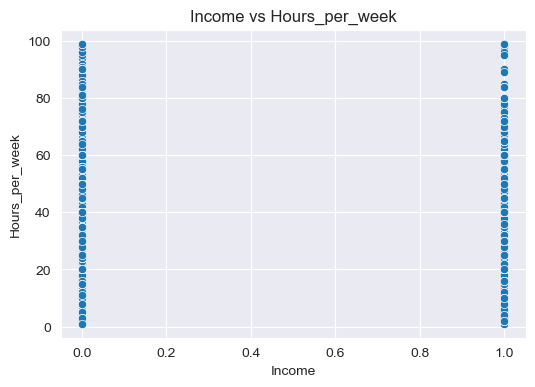

In [37]:
plt.figure(figsize= (6,4))
sns.scatterplot(data=df, x= 'Income', y= 'Hours_per_week')
plt.xlabel('Income')
plt.ylabel('Hours_per_week')
plt.title('Income vs Hours_per_week')
plt.show()

Here too relation is not defined properly.

Multivariate Analysis

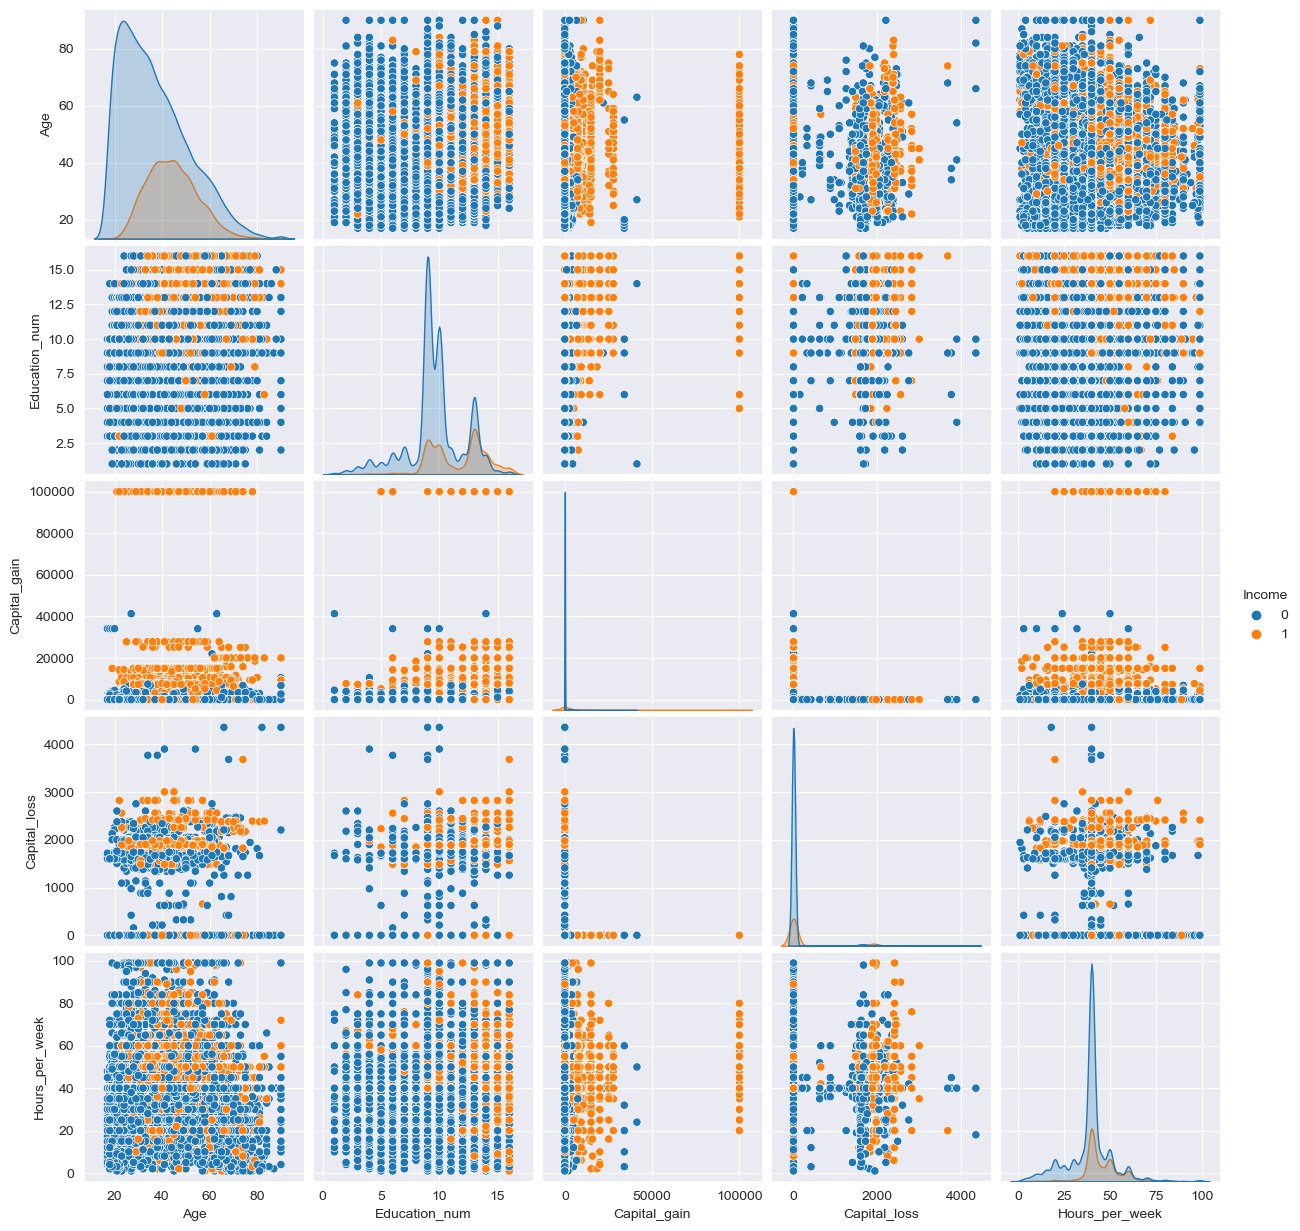

In [38]:
# Using pairplot

sns.pairplot(data=df, hue = 'Income')
plt.show()

In [39]:
df= df.drop(['Education'], axis = 1)

# Data Preprocessing

Here in this preprocessing step, we will be checking data with outliers, skewness , and will handle them using the different or suitable required technique. We will be encoding categorical columns so that it will be easy for prediction. After that we will check the correlation and will do some feature engineering to know the suitable features for predictions and visualize that by using heatmap.

# Outliers

Here first we will check all the numerical columns to check the presence of outliers there and then will proceed with handling them either by treating them or by removing them.

We will be using winsorizing method first to treat outliers and then will be using clip() function to limit the extreme values. By cliping these extreme values we will be setting boundaries to prevent extremely high or low values from skewing the data for analysisresults. This will help us here to mitigate the impact of outliers and extreme observations on the analysis and avoid causing data loss.

For this we will be importing necessary library first from scipy.stats.mstats

Winsorizing Method: Winsorizing is a data transformation technique used to handle outliers or extreme values in a dataset. It involves replacing extreme values with less extreme values, thereby reducing the impact of outliers on statistical analysis. In winsorizing, we will be trimming or censoring the extreme values by replacing them with the value which is closer to rest of the data. It helps in reducoing the impact of outliers on the statistical measures and provides a more robust analysis.It ensures that extreme values do not unduly influence the results or skew the distribution of the data.

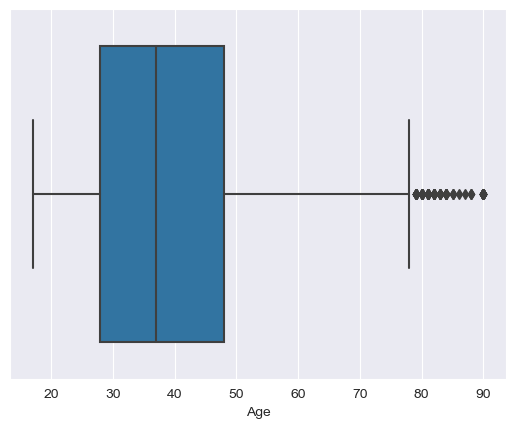

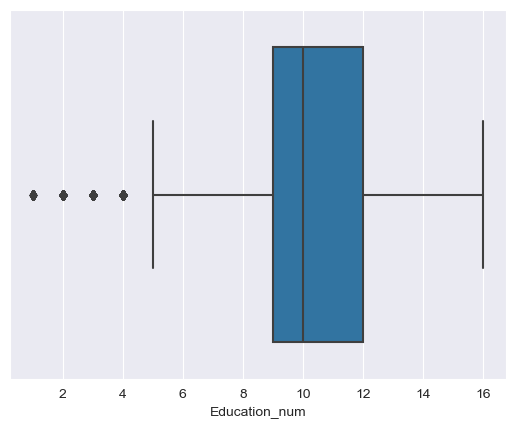

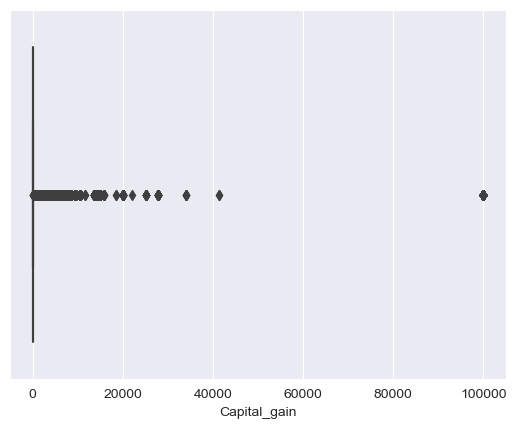

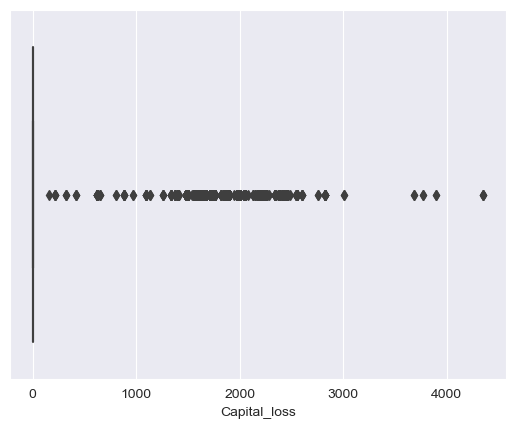

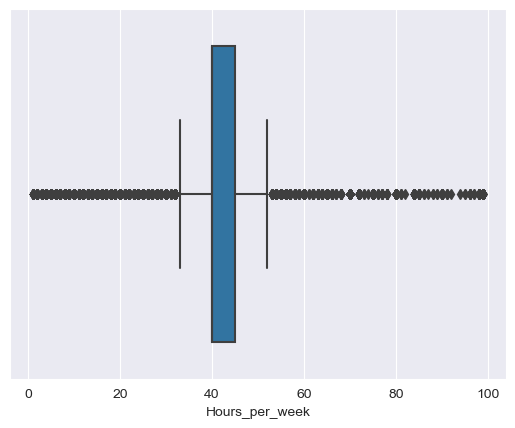

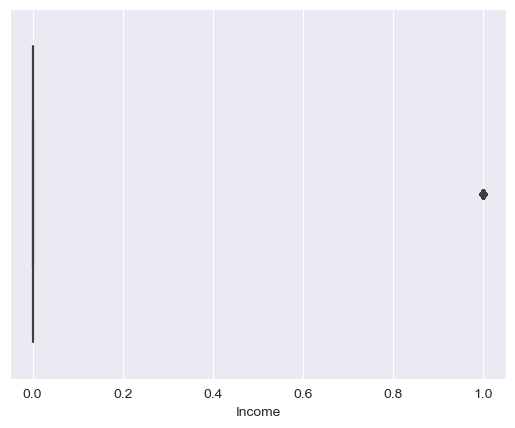

In [40]:
# Lets find out the outliers and handle them

numerical_columns = ['Age', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Income']

for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.show()

In [41]:
from scipy.stats.mstats import winsorize

# Winsorize all numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
df[num_cols] = df[num_cols].apply(lambda x: winsorize(x, limits=[0.05, 0.05]), axis=0)

# Clip extreme values
clip_values = df[num_cols].quantile([0.01, 0.99])
df[num_cols] = df[num_cols].clip(lower=clip_values.loc[0.01], upper=clip_values.loc[0.99], axis=1)

In [42]:
from scipy import stats
from scipy.stats import zscore

z_threshold = 3

# Clculate z-score for numerical columns
columns= ['Capital_gain', 'Hours_per_week']
z_scores= stats.zscore(df[columns])

# Identify and remove the outliers
outlier_indices= (np.abs(z_scores)> z_threshold).any(axis=1)
df= df[~outlier_indices]

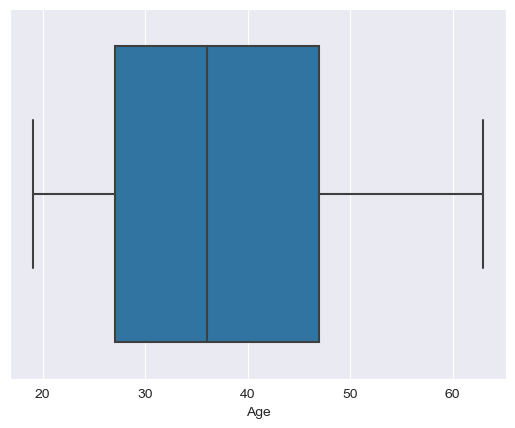

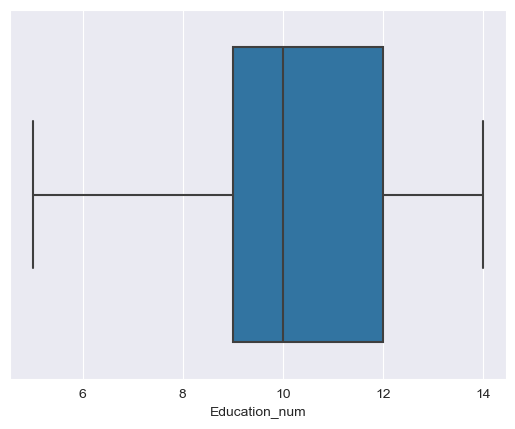

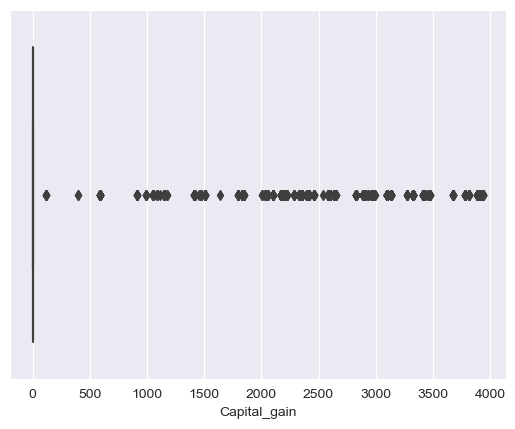

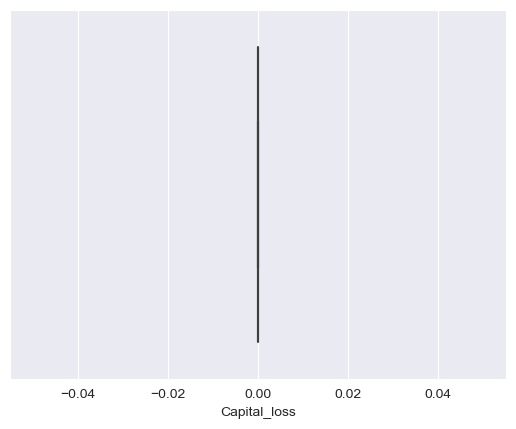

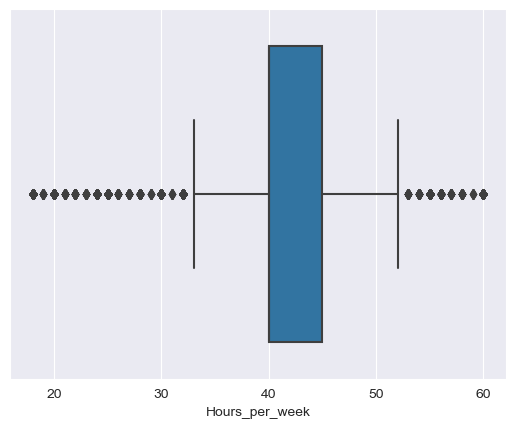

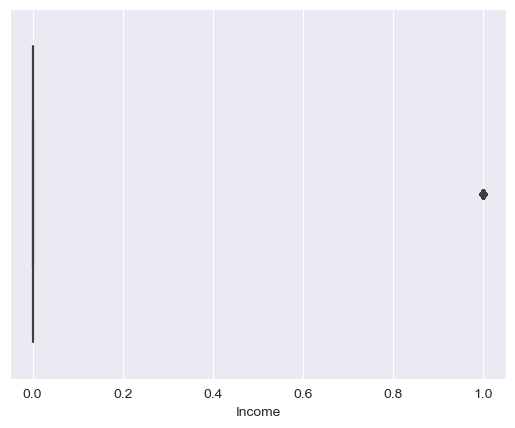

In [43]:
numerical_columns = ['Age', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Income']

for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.show()

In [44]:
df.shape

(30664, 13)

In [45]:
original_value = 32560
resulting_value = 30664

loss_percentage = ((original_value - resulting_value)/ original_value)* 100
print("Loss Percentage: {:.2f}%". format(loss_percentage))

Loss Percentage: 5.82%


In [46]:
df = df.drop(['Capital_loss'], axis = 1)

As we have handled outliers possibly and clipped the extreme value.

# Skewness

Here we will be checking for skewness and those values which are not in the range of -0.5 to +0.5, will be handling them.

We will be using Yeo-johnson transformation technique primarily to handle the skewness in the column.

Yeo-Johnson transformation: It is a statistical measure and a power transformation technique used to transform a non-normal distribution into a distribution that closely resembles a normal distribution. It is a extension to Boxcox transformation. It involves applying power transformation to the original data. It helps in improving the model's performance. Implementing the Yeo-Johnson transformation in Python can be done using libraries such as SciPy or scikit-learn, using 'from sklearn.preprocessing import PowerTransformer' .

In [47]:
df.skew()

Age               0.351235
Education_num    -0.092031
Capital_gain      6.641933
Hours_per_week   -0.251747
Income            1.469530
dtype: float64

In [48]:
from sklearn.preprocessing import PowerTransformer

# Define columns to transform
columns = ['Capital_gain', 'Income']
# Apply Yeo-Johnson transformation to selected columns
pt = PowerTransformer(method='yeo-johnson')
df[columns] = pt.fit_transform(df[columns])

# Round transformed values to 2 decimal places
df[columns] = df[columns].round(2)

df.skew()

Age               0.351235
Education_num    -0.092031
Capital_gain      5.886870
Hours_per_week   -0.251747
Income            1.469530
dtype: float64

In [49]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

# create a list of columns to transform
columns = ['Capital_gain', 'Income']

# apply BoxCox transformation to each column
for col in columns:
    data = df[col]
    # transform the data using BoxCox method
    data_transformed, lambda_val = boxcox(data+1)
    # replace the column with the transformed data
    df[col] = data_transformed
    
df.skew()    

Age               0.351235
Education_num    -0.092031
Capital_gain      5.886870
Hours_per_week   -0.251747
Income            1.469530
dtype: float64

In [50]:
# Apply cube root transformation

df['Capital_gain'] = np.cbrt(df['Capital_gain'])
df['Income'] = np.cbrt(df['Income'])

df.skew()

Age               0.351235
Education_num    -0.092031
Capital_gain      5.886870
Hours_per_week   -0.251747
Income            1.469530
dtype: float64

Here we have use boxcox transformation, and cuberoot transformation to handle skewness.
It is possibly handled.

# Encoding Categorical Columns

In [51]:
from sklearn.preprocessing import LabelEncoder

# Get all categorical columns
cat_columns = df.select_dtypes(include=['category']).columns.tolist()

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in cat_columns:
    df[col] = le.fit_transform(df[col])
    
df.dtypes    

Age                 int64
Workclass           int64
Education_num       int64
Marital_status      int64
Occupation          int64
Relationship        int64
Race                int64
Sex                 int64
Capital_gain      float64
Hours_per_week      int64
Native_country      int64
Income            float64
dtype: object

In [52]:
df['Income'] = df['Income'].astype(int)  

df.dtypes

Age                 int64
Workclass           int64
Education_num       int64
Marital_status      int64
Occupation          int64
Relationship        int64
Race                int64
Sex                 int64
Capital_gain      float64
Hours_per_week      int64
Native_country      int64
Income              int64
dtype: object

In [53]:
# Replace values in the income column
df['Income'] = df['Income'].replace({-1: 0, 0: 1})
df

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country,Income
0,50,6,13,2,4,0,4,1,-1.131761,18,39,0
1,38,4,9,0,6,1,4,1,-1.131761,40,39,0
2,53,4,7,2,6,0,2,1,-1.131761,40,39,0
3,28,4,13,2,10,5,2,0,-1.131761,40,5,0
4,37,4,14,2,4,5,4,0,-1.131761,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32554,22,4,10,4,11,1,4,1,-1.131761,40,39,0
32555,27,4,12,2,13,5,4,0,-1.131761,38,39,0
32556,40,4,9,2,7,0,4,1,-1.131761,40,39,1
32557,58,4,9,6,1,4,4,0,-1.131761,40,39,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30664 entries, 0 to 32558
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             30664 non-null  int64  
 1   Workclass       30664 non-null  int64  
 2   Education_num   30664 non-null  int64  
 3   Marital_status  30664 non-null  int64  
 4   Occupation      30664 non-null  int64  
 5   Relationship    30664 non-null  int64  
 6   Race            30664 non-null  int64  
 7   Sex             30664 non-null  int64  
 8   Capital_gain    30664 non-null  float64
 9   Hours_per_week  30664 non-null  int64  
 10  Native_country  30664 non-null  int64  
 11  Income          30664 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 3.0 MB


# Correlation Between Target and Independent Variable

In [55]:
# Check the correlation
df.corr()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country,Income
Age,1.000000,0.012098,0.030565,-0.290619,-0.015214,-0.267725,0.023459,0.084419,0.042246,0.105595,-0.002615,0.228492
Workclass,0.012098,1.000000,0.045255,-0.065222,0.259253,-0.090536,0.049805,0.093392,-0.005623,0.133236,-0.007762,0.045784
Education_num,0.030565,0.045255,1.000000,-0.060573,0.104385,-0.088986,0.029397,0.000678,-0.024791,0.154666,0.037636,0.307733
Marital_status,-0.290619,-0.065222,-0.060573,1.000000,-0.006846,0.186928,-0.067915,-0.125321,-0.006205,-0.205923,-0.023729,-0.190250
Occupation,-0.015214,0.259253,0.104385,-0.006846,1.000000,-0.076477,0.007113,0.079840,-0.013672,0.074601,-0.012613,0.072246
Relationship,-0.267725,-0.090536,-0.088986,0.186928,-0.076477,1.000000,-0.116245,-0.572788,-0.010434,-0.264556,-0.004124,-0.241741
Race,0.023459,0.049805,0.029397,-0.067915,0.007113,-0.116245,1.000000,0.087528,0.004218,0.045828,0.134046,0.069664
Sex,0.084419,0.093392,0.000678,-0.125321,0.079840,-0.572788,0.087528,1.000000,0.006286,0.241426,-0.009057,0.206664
Capital_gain,0.042246,-0.005623,-0.024791,-0.006205,-0.013672,-0.010434,0.004218,0.006286,1.000000,-0.011686,-0.002131,-0.038353
Hours_per_week,0.105595,0.133236,0.154666,-0.205923,0.074601,-0.264556,0.045828,0.241426,-0.011686,1.000000,-0.003976,0.236650


In [56]:
correlation_matrix= df.corr()
Income_correlation= correlation_matrix['Income']
print(Income_correlation)

Age               0.228492
Workclass         0.045784
Education_num     0.307733
Marital_status   -0.190250
Occupation        0.072246
Relationship     -0.241741
Race              0.069664
Sex               0.206664
Capital_gain     -0.038353
Hours_per_week    0.236650
Native_country    0.015412
Income            1.000000
Name: Income, dtype: float64


# Visualization of Correlation Matrix

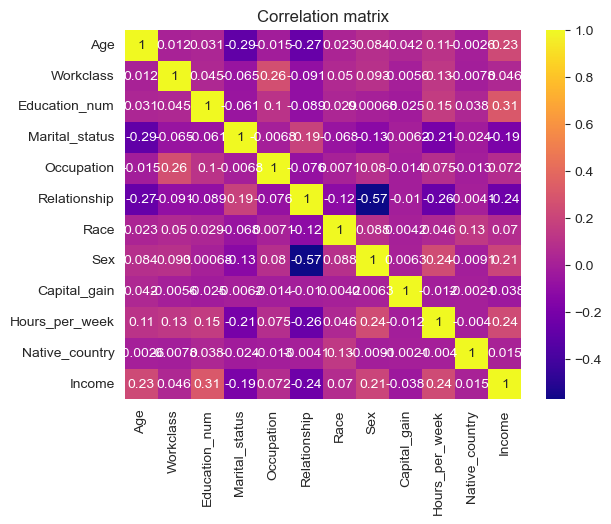

In [57]:
# Let's visualize the relation by using heatmap

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='plasma')
plt.title('Correlation matrix')
plt.show()

# Feature Engineering

Now we will be defining the target and independent variable, so that it will be clear what to predict on what basis. Then we will proceed with the feature scaling process using MinMaxScaler from sklearn.preprocessing.

Feature Scaling: It is performed to bring all the features to a similar scale or value range. It basically helps in improving the performance, convergence, and interpretability of ML algorithm. It ensures that all features should be treated equally during the modeling.

MinMaxScaler: This technique used to transform features by scaling them to a specified range which should be between 0-1. It ensures that all features are scaled proportionally. This technique is useful to preserve the shape of the original distribution while bringing all features to a common scale.

After this we will proceed with checking out for multicollinearity by finding the vif(variation inflation factor) values. For this we will be importing statsmodels.api and then from statsmodels.stats.outliers_inflation importing variance_inflation_factor to find out the vif values for the features.

A vif value 1 indicates no multicollinearity, while values greater than 1 suggest increasing multicollinearity. Generally , vif value above 5 or 10 is considered very high, so in that case we need to handle the multicollinearity.

If we will find any value above range we will be handling that by dropping one or two column with high multicollinearity, an will also be adding constant term for calculating vif. A constant term will allow and help us for a more accurate assessment of multicollinearity and its impact on predictor variable.

After handling multicollinearity issue, we will proceed with finding the Best Random State, which will ensure that further operations should be reproducible. Here we will be using logistic regression algorithm for classification tasks to generate the best random state. The genrated best random score by this alogorithm should be used in all further runs for results reproducibility.

We will have to balance the target variable if there is any imbalance, and in that case we will be using RandomOverSampler technique.

Now we will be spliting the data into train and test so that we can train models on train data and can check its performance on test data. As We have a limited observation so, we will be taking "test size- 0.2", rest will be used as train data to train the model.

# Target and Independent Variable

In [58]:
# Define Target and Independent Variable

y = df['Income']
X = df.drop('Income', axis=1)

print("Target variable name: ", y.name)
print("Target variable dimensions: ", y.shape)

print("\nFeatures variables names: ", list(X.columns))
print("Features variables dimensions: ", X.shape)

Target variable name:  Income
Target variable dimensions:  (30664,)

Features variables names:  ['Age', 'Workclass', 'Education_num', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain', 'Hours_per_week', 'Native_country']
Features variables dimensions:  (30664, 11)


# Feature Selection

In [60]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

y = df['Income']
X = df.drop('Income', axis=1)

# Initialize the model
model= RandomForestClassifier()

# Initialize the RFE selector with model
rfe= RFE(model, n_features_to_select=5)

# Fit the selctor on data
rfe.fit(X,y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the features
print(selected_features)

Index(['Age', 'Education_num', 'Occupation', 'Relationship', 'Hours_per_week'], dtype='object')


In [61]:
fit_score = rfe.ranking_
print(fit_score)
# Get the column names of all features
all_columns = X.columns
feature_rankings = pd.DataFrame({'Feature': all_columns, 'Ranking': fit_score})

# Sort the features based on their rankings (lower rank indicates higher importance)
feature_rankings = feature_rankings.sort_values('Ranking')

print(feature_rankings)

[1 3 1 2 1 1 5 6 7 1 4]
           Feature  Ranking
0              Age        1
2    Education_num        1
4       Occupation        1
5     Relationship        1
9   Hours_per_week        1
3   Marital_status        2
1        Workclass        3
10  Native_country        4
6             Race        5
7              Sex        6
8     Capital_gain        7


In [62]:
X = X.drop(['Capital_gain', 'Sex'], axis = 1)

# Feature Scaling

In [63]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Apply to all columns
X_scaled = scaler.fit_transform(X)

# Create a new dataframe with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df)

            Age  Workclass  Education_num  Marital_status  Occupation  \
0      0.704545       0.75       0.888889        0.333333    0.285714   
1      0.431818       0.50       0.444444        0.000000    0.428571   
2      0.772727       0.50       0.222222        0.333333    0.428571   
3      0.204545       0.50       0.888889        0.333333    0.714286   
4      0.409091       0.50       1.000000        0.333333    0.285714   
...         ...        ...            ...             ...         ...   
30659  0.068182       0.50       0.555556        0.666667    0.785714   
30660  0.181818       0.50       0.777778        0.333333    0.928571   
30661  0.477273       0.50       0.444444        0.333333    0.500000   
30662  0.886364       0.50       0.444444        1.000000    0.071429   
30663  0.068182       0.50       0.444444        0.666667    0.071429   

       Relationship  Race  Hours_per_week  Native_country  
0               0.0   1.0        0.000000        0.951220  
1  

# Variance Inflation Factor(VIF)

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# add a constant column to features
X_scaled_df = sm.add_constant(X_scaled_df)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["X"] = X_scaled_df.columns
vif["VIF"] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

# Print the VIF dataframe
print(vif)

                X        VIF
0           const  65.501740
1             Age   1.154030
2       Workclass   1.092931
3   Education_num   1.038164
4  Marital_status   1.142766
5      Occupation   1.086998
6    Relationship   1.174910
7            Race   1.036648
8  Hours_per_week   1.137617
9  Native_country   1.020606


All vif are in range.

# Value Count of Target Variable

In [65]:
y.value_counts()

0    24410
1     6254
Name: Income, dtype: int64

# Best Random State

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the features and target variables
X = df.drop('Income', axis=1)
y = df['Income']

# Initialize variables to store the best accuracy score and corresponding random state
best_score = 0
best_state = 0

# Loop through different random states
for state in range(1, 101):
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)

    # Initialize the model
    rfc = RandomForestClassifier()
    
    # Train the model on the training data
    rfc.fit(X_train, y_train)
    
    # Test the model on the testing data and get the accuracy score
    rfc_score = accuracy_score(y_test, rfc.predict(X_test))
    
    # Get the maximum accuracy score and corresponding random state
    if rfc_score > best_score:
        best_score = rfc_score
        best_state = state
    
print(f'Best accuracy score: {best_score}')
print(f'Max random state: {best_state}')

Best accuracy score: 0.8442850154899723
Max random state: 55


Best accuracy score is 0.8442850154899723 on best random state 55.

# Split the Data

In [67]:
# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24531, 11)
(6133, 11)
(24531,)
(6133,)


# Oversampling

In [68]:
from imblearn.over_sampling import RandomOverSampler

# Define the target variable from the features
X = df.drop('Income', axis=1)
y = df['Income']

# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=0)

# Fit and resample the data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the value counts of the resampled target variable
print(y_resampled.value_counts())

0    24410
1    24410
Name: Income, dtype: int64


# Modelling

Classification Algorithm:

Now we will be start modelling process which involve the train the model on training dataset and make it ready for testing or prediction phase. For modelling we will be using classification algorithm as this is the classification problem, where we have to predict the region.

We will be using different algorithms to check which one is performing best on both testing and test data depends on this specific dataset and make it ready for making prediction on unseen data. Algorithms will be used in this problems are: Logistic Regression will be importing from sklearn.linear_model, DecisionTreeClassifier will be importing from sklearn.tree, RandomForestClassifier,ExtraTreeClassifier, GradientBoostClassifier, AdaBoostClassifier, Bagging Classifier will be importing from sklearn.ensemble, GaussianNB will be importing from sklearn.naive_bayes, KNeighborsClassifier will be importing from sklearn.neighbors .

We will be train our model on each algorithms and will be evaluating the accuracy and the classification report. per On this basis we will first find out which one will be performing well, then further for more accuracy we will be finding out cross validation score and will find out the difference between the accuracy score and the CV score, lesser the difference accurate the performance, and finally we will be using hyperparameter tuning to hypertune the best three performing model base on lesser difference to check their performance. At last we will be saving that model for future prediction on unseen data.

We will be importing cross_val_score from sklearn.models_selection .

# LogisticRegression(LR)

In [69]:
# Initialize and train model
model = LogisticRegression(random_state=55)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)
print("Confusion matrix: \n", conf_matrix)

Accuracy:  0.8157508560247839
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4884
           1       0.60      0.29      0.39      1249

    accuracy                           0.82      6133
   macro avg       0.72      0.62      0.64      6133
weighted avg       0.79      0.82      0.79      6133

Confusion matrix: 
 [[4637  247]
 [ 883  366]]


Accuracy score of this model is 82%.

# DecisionTreeClassification(DTC)

In [70]:
# Initialize and train model
model = DecisionTreeClassifier(random_state=55)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)
print("Confusion matrix: \n", conf_matrix)

Accuracy:  0.8111853905103539
Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      4884
           1       0.54      0.49      0.51      1249

    accuracy                           0.81      6133
   macro avg       0.71      0.69      0.70      6133
weighted avg       0.81      0.81      0.81      6133

Confusion matrix: 
 [[4361  523]
 [ 635  614]]


Accuracy score of this model is 81% .

# RandomForestClassification

In [71]:
# Initialize and Train the model
model = RandomForestClassifier(random_state= 55)
model.fit(X_train, y_train)

# Make prediction on test data
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)
print("Confusion matrix: \n", conf_matrix)

Accuracy:  0.8431436491113647
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      4884
           1       0.64      0.52      0.57      1249

    accuracy                           0.84      6133
   macro avg       0.76      0.72      0.74      6133
weighted avg       0.83      0.84      0.84      6133

Confusion matrix: 
 [[4524  360]
 [ 602  647]]


Accuracy score of this model is 84% .

# ExtraTreeClassification(ETC)

In [72]:
# Initialize and train model
model = ExtraTreesClassifier(random_state=55)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)
print("Confusion matrix: \n", conf_matrix)

Accuracy:  0.8333605087233001
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      4884
           1       0.61      0.49      0.55      1249

    accuracy                           0.83      6133
   macro avg       0.74      0.71      0.72      6133
weighted avg       0.82      0.83      0.83      6133

Confusion matrix: 
 [[4497  387]
 [ 635  614]]


Accuracy score of this model is 83% .

# GradientBoostingClassification(GBC)

In [73]:
# Initialize and train model
model = GradientBoostingClassifier(random_state=55)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)
print("Confusion matrix: \n", conf_matrix)

Accuracy:  0.8570030979944562
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      4884
           1       0.71      0.51      0.59      1249

    accuracy                           0.86      6133
   macro avg       0.79      0.73      0.75      6133
weighted avg       0.85      0.86      0.85      6133

Confusion matrix: 
 [[4617  267]
 [ 610  639]]


Accuracy score of this model is 86% .

# AdaBoostClassification(ABC)

In [74]:
# Initialize and train model
model = AdaBoostClassifier(random_state=55)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)
print("Confusion matrix: \n", conf_matrix)

Accuracy:  0.8522745801402251
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      4884
           1       0.69      0.50      0.58      1249

    accuracy                           0.85      6133
   macro avg       0.78      0.72      0.75      6133
weighted avg       0.84      0.85      0.84      6133

Confusion matrix: 
 [[4598  286]
 [ 620  629]]


Accuarcy score of this model is 85% . 

# Bagging Classification

In [75]:
# Initialize and train model
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                          n_estimators=100, random_state=55)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)
print("Confusion matrix: \n", conf_matrix)

Accuracy:  0.8384151312571335
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      4884
           1       0.62      0.52      0.57      1249

    accuracy                           0.84      6133
   macro avg       0.75      0.72      0.73      6133
weighted avg       0.83      0.84      0.83      6133

Confusion matrix: 
 [[4489  395]
 [ 596  653]]


Accuracy score of this model is 84% . 

# KNeighborsClassification(KNN)

In [76]:
# Initialize and train model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)
print("Confusion matrix: \n", conf_matrix)

Accuracy:  0.8242295776944399
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.91      0.89      4884
           1       0.58      0.50      0.54      1249

    accuracy                           0.82      6133
   macro avg       0.73      0.70      0.71      6133
weighted avg       0.82      0.82      0.82      6133

Confusion matrix: 
 [[4431  453]
 [ 625  624]]


Accuracy score of this model is 82% .

# SupportVectorClassification(SVC)

In [77]:
# Initialize and train model
model = SVC(kernel='linear', random_state=55)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)
print("Confusion matrix: \n", conf_matrix)

Accuracy:  0.7963476275884559
Classification report: 
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      4884
           1       0.00      0.00      0.00      1249

    accuracy                           0.80      6133
   macro avg       0.40      0.50      0.44      6133
weighted avg       0.63      0.80      0.71      6133

Confusion matrix: 
 [[4884    0]
 [1249    0]]


Accuracy score of this model is 80% .

# GaussianNB(Naive-Bayes)

In [78]:
# Initialize and train model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)
print("Confusion matrix: \n", conf_matrix)

Accuracy:  0.7854231208217838
Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.81      0.86      4884
           1       0.48      0.70      0.57      1249

    accuracy                           0.79      6133
   macro avg       0.70      0.75      0.71      6133
weighted avg       0.83      0.79      0.80      6133

Confusion matrix: 
 [[3939  945]
 [ 371  878]]


Accuracy score of this model s 79% .

According to accuracy GradientBoostingClassification shows highest accuracy of 86% .

# Cross Validation Score(CV Score)

# LR CV Score

In [79]:
# checking cv score for lr 
lr_cv = LogisticRegression()
lr_cv.fit(X_train, y_train)

lr_cv_score = cross_val_score(lr_cv, X_train, y_train, cv=5)
print("Cross Validation Score:", lr_cv_score)
print("Mean CV Score:", np.mean(lr_cv_score))

predlr_cv = lr_cv.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predlr_cv))
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, predlr_cv) - np.mean(lr_cv_score))

Cross Validation Score: [0.81414306 0.80941704 0.81675499 0.82286996 0.80819405]
Mean CV Score: 0.8142758196876911
Accuracy: 0.8157508560247839
Difference between accuracy score and cross-validation score is: 0.0014750363370927833


# DTC CV Score

In [80]:
model = DecisionTreeClassifier(random_state=55)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.79539433 0.80411741 0.79555646 0.79188748 0.79351814]
Mean CV Score: 0.7960947658241082
Accuracy: 0.8111853905103539
Difference between accuracy score and cross-validation score is: 0.015090624686245668


# RFC CV Score

In [81]:
model = RandomForestClassifier(n_estimators=100, random_state=55)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# print the cross-validation scores and mean score
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.82535154 0.83448838 0.83224623 0.82837342 0.83571137]
Mean CV Score: 0.8312341886857475
Accuracy: 0.8431436491113647
Difference between accuracy score and cross-validation score is: 0.011909460425617246


# ETC CV Score

In [82]:
model = ExtraTreesClassifier(n_estimators=100, random_state=55)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.8176075  0.82715043 0.83020791 0.82613127 0.82735426]
Mean CV Score: 0.8256902728292095
Accuracy: 0.8333605087233001
Difference between accuracy score and cross-validation score is: 0.00767023589409066


# GBC CV Score

In [83]:
model = GradientBoostingClassifier(random_state=55)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.85571632 0.85079494 0.84997962 0.85344476 0.85181411]
Mean CV Score: 0.8523499504148544
Accuracy: 0.8570030979944562
Difference between accuracy score and cross-validation score is: 0.00465314757960178


# ABC CV Score

In [84]:
model = AdaBoostClassifier(random_state=55)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.85001019 0.84834896 0.85059111 0.84753363 0.85262943]
Mean CV Score: 0.8498226657077241
Accuracy: 0.8522745801402251
Difference between accuracy score and cross-validation score is: 0.0024519144325009234


# Bagging Classification CV Score

In [85]:
model = BaggingClassifier(random_state=55)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation scor
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.81821887 0.82348145 0.82327762 0.82144313 0.82470444]
Mean CV Score: 0.8222251031850387
Accuracy: 0.8358062938203163
Difference between accuracy score and cross-validation score is: 0.013581190635277629


# KNN CV Score

In [86]:
model = KNeighborsClassifier()

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.81312411 0.81879331 0.81797799 0.80860171 0.81940481]
Mean CV Score: 0.8155803862980671
Accuracy: 0.8242295776944399
Difference between accuracy score and cross-validation score is: 0.00864919139637288


# SVC CV Score

In [87]:
model = SVC()

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score 
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.80089668 0.8053404  0.80207909 0.80452507 0.80187525]
Mean CV Score: 0.8029432981378631
Accuracy: 0.8056416109571173
Difference between accuracy score and cross-validation score is: 0.002698312819254145


# GNB CV Score

In [88]:
model = GaussianNB()
# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.77501528 0.78230738 0.78923767 0.78088055 0.79127599]
Mean CV Score: 0.7837433748355366
Accuracy: 0.7854231208217838
Difference between accuracy score and cross-validation score is: 0.0016797459862472053


Based on the differences between accuracy score and cross-validation score, the model with the lowest score (i.e., the smallest difference) is LogisticRegression with a score of 0.0014750363370927833. This indicates that the performance of the model on the test set is consistent with its performance during cross-validation, which is a good sign of a well-performing model.

LogisticRegression is the best performing model here according to CV Score.

Let's perform Hyperparameter tuning on best performing model with least difference to check the accuracy.

# Hyperparameter Tuning

Randomized SearchCV

# LogisticRegression

In [89]:
# Create the model
logreg = LogisticRegression(random_state=55)

# Define the parameter distributions to sample from
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000, 1500, 2000]}

# Perform Randomized Search CV with 5-fold cross validation
random_search = RandomizedSearchCV(logreg, param_distributions=param_dist, n_iter=100, cv=5, random_state=55)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best parameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 1500, 'C': 0.615848211066026}
Best score: 0.8240184679224359


# GaussianNB

In [90]:
from sklearn.naive_bayes import GaussianNB

# Create the model
gnb = GaussianNB()

# Define the parameter distributions to sample from
param_dist = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Create the randomized search CV object
gnb_random = RandomizedSearchCV(gnb, param_distributions=param_dist, cv=5, n_iter=100, random_state=55)

# Fit the randomized search CV object on the data
gnb_random.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", gnb_random.best_params_)
print("Best score:", gnb_random.best_score_)

Best parameters: {'var_smoothing': 0.006579332246575682}
Best score: 0.8242224328897434


# AdaBoostClassification

In [91]:
from scipy.stats import uniform

# Create the AdaBoost model
abc = AdaBoostClassifier()

# Define the parameter distribution to sample from
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': uniform(0.01, 0.5),
    'algorithm': ['SAMME', 'SAMME.R']}

# Create the RandomizedSearchCV object
abc_random = RandomizedSearchCV(abc, param_distributions=param_dist, n_iter=100, cv=5)

# Fit the RandomizedSearchCV object to the data
abc_random.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", abc_random.best_params_)
print("Best score:", abc_random.best_score_)

Best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.47363256752647, 'n_estimators': 200}
Best score: 0.8514124227135108


After performing hyperparameter tuning on best three model with least difference we have concluded that GaussianNB is the best performing and fitted model, as it increses its accuracy as earlier it was 78.5 now it is 82.4% with hyperparameter tune.

GaussianNB is the best fitted and performing model.

Let's plot AUC-ROC curve for more accuracy and at last save this model for future prediction on unseen data.

# ROC-AUC Curve

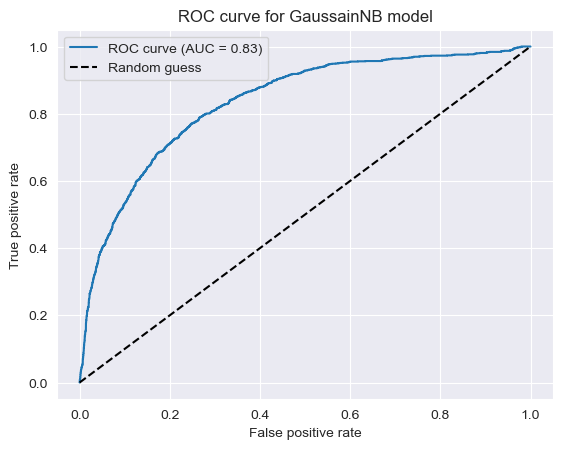

In [92]:
from sklearn.metrics import roc_curve, roc_auc_score

# Initialize the DecisionTreeClassifier model
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train, y_train)

# Predict probabilities for the test data
y_probs = gnb.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for GaussainNB model')
plt.legend(loc='best')
plt.show()

In [93]:
from sklearn.metrics import roc_auc_score

# Fit the model on the training data
gnb.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_proba = gnb.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("AUC score:", roc_auc)

AUC score: 0.8345583920043488


As we have plotted ROC curve for GaussianNB model and found AUC score is 83.4%

# Save the Model

In [94]:
# Save the model using joblib
joblib.dump(gnb, 'Census_Income_model.joblib')

['Census_Income_model.joblib']